<a href="https://colab.research.google.com/github/pgrts/hky/blob/main/Scrape_NHL_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello friend,

📊 🏒 Accessing data is the first challenge of any analysis, and in lots of cases, it can be a tedious task. For some, how difficult it is can even stop their ambition to do the hockey project they want to work on. I have been there too.

This is why I made a notebook that includes functions to scrape data from NHL.com for people who might be interested in hockey data. You can use those functions and adapt them for your own needs.

I hope I can help some of you!


---
If you enjoyed this notebook, follow me on [Twitter](https://x.com/woumaxx) and [Bluesky](https://bsky.app/profile/maxtixador.bsky.social)

First, let's import the libraries we will use to scrape the data.

In [ ]:
# Install Selenium
!pip install selenium

# Install Chrome
!apt-get update
!apt-get install -y chromium-chromedriver

import pandas as pd
import numpy as np
import requests
import json
from bs4 import BeautifulSoup

# Set environment path to ChromeDriver
import os
os.environ["PATH"] += ":/usr/lib/chromium-browser/"


from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time


# import matplotlib.pyplot as plt
# import seaborn as sns

pd.set_option('display.max_columns', None)

# pd.set_option('display.max_rows', None)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 22.3 MB/s eta 0:00:00
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,696 kB]

#Draft

## Selections

In [ ]:
def scrapeDraft(year = 2023, round = "all"):
    """
    Scrapes draft data from the NHL website for a given year and round.

    Parameters :
      - year (int) : The year of the Draft you want to scrape the data from. Default is set to 2023.
      - round (int/str) : The round of the Draft you want to scrape the data from. It generally takes integers, but you can have "all" to get all rounds. Default is set to "all".

    Returns :
      - draft_df (pd.DataFrame) : A DataFrame containing the scraped draft data.

    """


    url = f"https://api-web.nhle.com/v1/draft/picks/{year}}/{round}"

    response = requests.get(url).json()

    draft_df = pd.json_normalize(response["picks"])

    # Add meta data (datetime of the execution)
    draft_df["meta_datetime"] = pd.to_datetime("now")



    return draft_df


scrapeDraft()

,round,pickInRound,overallPick,teamId,teamAbbrev,teamLogoLight,teamLogoDark,teamPickHistory,positionCode,countryCode,height,weight,amateurLeague,amateurClubName,teamName.default,teamName.fr,teamCommonName.default,teamPlaceNameWithPreposition.default,teamPlaceNameWithPreposition.fr,displayAbbrev.default,firstName.default,lastName.default,teamCommonName.fr,meta_datetime
0,1,1,1,16,CHI,https://assets.nhle.com/logos/nhl/svg/CHI_ligh...,https://assets.nhle.com/logos/nhl/svg/CHI_dark...,CHI,C,CAN,70,185,WHL,Regina,Chicago Blackhawks,Blackhawks de Chicago,Blackhawks,Chicago,de Chicago,CHI,Connor,Bedard,NaN,2024-11-07 17:41:03.867763
1,1,2,2,24,ANA,https://assets.nhle.com/logos/nhl/svg/ANA_2013...,https://assets.nhle.com/logos/nhl/svg/ANA_2013...,ANA,C,SWE,74,194,SWEDEN,Orebro,Anaheim Ducks,Ducks d'Anaheim,Ducks,Anaheim,d'Anaheim,ANA,Leo,Carlsson,NaN,2024-11-07 17:41:03.867763
2,1,3,3,29,CBJ,https://assets.nhle.com/logos/nhl/svg/CBJ_ligh...,https://assets.nhle.com/logos/nhl/svg/CBJ_dark...,CBJ,C,CAN,74,195,BIG10,Michigan,Columbus Blue Jackets,Blue Jackets de Columbus,Blue Jackets,Columbus,de Columbus,CBJ,Adam,Fantilli,NaN,2024-11-07 17:41:03.867763
3,1,4,4,28,SJS,https://assets.nhle.com/logos/nhl/svg/SJS_2008...,https://assets.nhle.com/logos/nhl/svg/SJS_2008...,SJS,C,USA,72,180,NTDP,USA U-18,San Jose Sharks,Sharks de San Jose,Sharks,San Jose,de San Jose,SJS,Will,Smith,NaN,2024-11-07 17:41:03.867763
4,1,5,5,8,MTL,https://assets.nhle.com/logos/nhl/svg/MTL_ligh...,https://assets.nhle.com/logos/nhl/svg/MTL_dark...,MTL,D,AUT,74,194,SWISS,Kloten,Montréal Canadiens,Canadiens de Montréal,Canadiens,Montréal,de Montréal,MTL,David,Reinbacher,NaN,2024-11-07 17:41:03.867763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,7,28,220,6,BOS,https://assets.nhle.com/logos/nhl/svg/BOS_2008...,https://assets.nhle.com/logos/nhl/svg/BOS_2008...,BOS,D,SWE,77,213,SWEDEN-JR.,Frolunda Jr.,Boston Bruins,Bruins de Boston,Bruins,Boston,de Boston,BOS,Kristian,Kostadinski,NaN,2024-11-07 17:41:03.867763
220,7,29,221,25,DAL,https://assets.nhle.com/logos/nhl/svg/DAL_ligh...,https://assets.nhle.com/logos/nhl/svg/DAL_dark...,DAL,LW,CAN,75,196,USMAAAE,Elite Hockey Academy 18U,Dallas Stars,Stars de Dallas,Stars,Dallas,de Dallas,DAL,Sebastian,Bradshaw,NaN,2024-11-07 17:41:03.867763
221,7,30,222,12,CAR,https://assets.nhle.com/logos/nhl/svg/CAR_ligh...,https://assets.nhle.com/logos/nhl/svg/CAR_dark...,CAR,G,RUS,74,172,RUSSIA-2,Voronezh,Carolina Hurricanes,Hurricanes de la Caroline,Hurricanes,Carolina,de la Caroline,CAR,Egor,Velmakin,NaN,2024-11-07 17:41:03.867763
222,7,31,223,5,PIT,https://assets.nhle.com/logos/nhl/svg/PIT_ligh...,https://assets.nhle.com/logos/nhl/svg/PIT_dark...,FLA-PIT,D,FIN,76,205,FINLAND-JR.,Jokerit Jr.,Pittsburgh Penguins,Penguins de Pittsburgh,Penguins,Pittsburgh,de Pittsburgh,PIT,Kalle,Kangas,NaN,2024-11-07 17:41:03.867763


## Central of Scouting Rankings

In [ ]:
def scrapeRankings(year=2024, category=1):
    """
    Scrapes draft rankings from the NHL website for a given year and category.

    Parameters :
      - year (int) : The year of the Draft you want to scrape the data from. Default is set to 2024.
      - category (int) : The category of the Draft you want to scrape the data from. Default is set to 1.
        1 = North American Skaters
        2 = International Skaters
        3 = North American Goalies
        4 = International Goalies

    Returns :
      - draft_rankings_df (pd.DataFrame) : A DataFrame containing the scraped draft rankings data.

    """

    # By the Central of Scouting of the NHL

    url = f"https://api-web.nhle.com/v1/draft/rankings/{year}/{category}"

    # Which category is what id
    categoryDict = {
        "north-american-skater": 1,
        "international-skater": 2,
        "north-american-goalie": 3,
        "international-goalie": 4
    }



    response = requests.get(url).json()

    draft_rankings_df = pd.json_normalize(response["rankings"])

    # Add meta data (datetime of the execution)
    draft_rankings_df["meta_datetime"] = pd.to_datetime("now")

    return draft_rankings_df


scrapeRankings()

,lastName,firstName,positionCode,shootsCatches,heightInInches,weightInPounds,lastAmateurClub,lastAmateurLeague,birthDate,birthCity,birthStateProvince,birthCountry,midtermRank,finalRank,meta_datetime
0,Celebrini,Macklin,C,L,72,197,Boston University,H-EAST,2006-06-13,North Vancouver,BC,CAN,1.0,1.0,2024-11-07 17:41:04.258012
1,Levshunov,Artyom,D,R,74,205,Michigan State U.,BIG10,2005-10-28,Zhlobin,NaN,BLR,2.0,2.0,2024-11-07 17:41:04.258012
2,Lindstrom,Cayden,C,L,75,213,Medicine Hat,WHL,2006-02-03,Dawson Creek,BC,CAN,3.0,3.0,2024-11-07 17:41:04.258012
3,Buium,Zeev,D,L,72,186,Denver,NCHC,2005-12-07,San Diego,CA,USA,4.0,4.0,2024-11-07 17:41:04.258012
4,Parekh,Zayne,D,R,72,187,Saginaw,OHL,2006-02-15,Markham,ON,CAN,10.0,5.0,2024-11-07 17:41:04.258012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Serlin,Leo,RW,R,72,191,GUELPH,OHL,2006-01-20,Toronto,ON,CAN,218.0,NaN,2024-11-07 17:41:04.258012
247,Good,Jack,LW,L,69,173,BROOKS,BCHL,2006-03-31,Ajax,ON,CAN,219.0,NaN,2024-11-07 17:41:04.258012
248,Kubiesa,Matej,RW,R,71,171,TRINEC JR.,CZECHIA-JR.,2006-09-11,Frydek-Mistek,NaN,CZE,220.0,NaN,2024-11-07 17:41:04.258012
249,Hyles,Kole,C,R,72,189,CEDAR RAPIDS,USHL,2006-01-16,Portsmouth,NH,USA,222.0,NaN,2024-11-07 17:41:04.258012


# Stats - Work in progress

In [ ]:
# Stats on NHL.com
url_template = f"https://api.nhle.com/stats/rest/en/skater/summary?isAggregate={{{'is_aggregate'}}}&isGame={{{'is_game'}}}&sort={{{'sort'}}}&start={{{'start'}}}&limit={{{'limit'}}}&cayenneExp=gameTypeId={{{'game_type_id'}}}%20and%20seasonId%3C={{{'season_id_max'}}}%20and%20seasonId%3E={{{'season_id_min'}}}"

url = url_template.format(
    is_aggregate="false",
    is_game="false",
    sort="%5B%7B%22property%22:%22pointsPerGame%22,%22direction%22:%22DESC%22%7D,%7B%22property%22:%22goals%22,%22direction%22:%22DESC%22%7D,%7B%22property%22:%22assists%22,%22direction%22:%22DESC%22%7D,%7B%22property%22:%22playerId%22,%22direction%22:%22ASC%22%7D%5D",
    start="0",
    limit="50",
    game_type_id="2",
    season_id_max="20242025",
    season_id_min="20242025"
)

# "https://api.nhle.com/stats/rest/en/skater/summary?isAggregate=false&isGame=false&sort=%5B%7B%22property%22:%22pointsPerGame%22,%22direction%22:%22DESC%22%7D,%7B%22property%22:%22playerId%22,%22direction%22:%22ASC%22%7D%5D&start=0&limit=50&factCayenneExp=gamesPlayed%3E=30&cayenneExp=gameTypeId=2%20and%20seasonId%3C=20242025%20and%20seasonId%3E=20242025"


url = "https://api.nhle.com/stats/rest/en/skater/summary?isAggregate=false&isGame=false&sort=%5B%7B%22property%22:%22points%22,%22direction%22:%22DESC%22%7D,%7B%22property%22:%22goals%22,%22direction%22:%22DESC%22%7D,%7B%22property%22:%22assists%22,%22direction%22:%22DESC%22%7D,%7B%22property%22:%22playerId%22,%22direction%22:%22ASC%22%7D%5D&start=0&limit=1000&cayenneExp=franchiseId%3D1%20and%20gameTypeId=2%20and%20seasonId%3C=20242025%20and%20seasonId%3E=20232024"
response = requests.get(url).json()

stats_df = pd.json_normalize(response["data"])


stats_df.head()



,assists,evGoals,evPoints,faceoffWinPct,gameWinningGoals,gamesPlayed,goals,lastName,otGoals,penaltyMinutes,playerId,plusMinus,points,pointsPerGame,positionCode,ppGoals,ppPoints,seasonId,shGoals,shPoints,shootingPct,shootsCatches,shots,skaterFullName,teamAbbrevs,timeOnIcePerGame
0,44,21,46,0.52555,1,82,33,Suzuki,1,36,8480018,-14,77,0.93902,C,12,31,20232024,0,0,0.17837,R,185,Nick Suzuki,MTL,1275.8414
1,37,19,44,0.43750,7,82,28,Caufield,3,16,8481540,-4,65,0.79268,R,9,21,20232024,0,0,0.08917,R,314,Cole Caufield,MTL,1165.2317
2,51,4,32,NaN,0,82,11,Matheson,0,58,8476875,-24,62,0.75609,D,5,28,20232024,2,2,0.05882,L,187,Mike Matheson,MTL,1533.1707
3,30,14,36,0.50000,2,82,20,Slafkovsky,0,55,8483515,-19,50,0.60975,L,6,14,20232024,0,0,0.13157,L,152,Juraj Slafkovsky,MTL,1076.1463
4,22,5,17,0.55034,3,49,13,Monahan,0,10,8477497,-10,35,0.71428,C,6,16,20232024,2,2,0.12500,L,104,Sean Monahan,"MTL,WPG",1107.2857


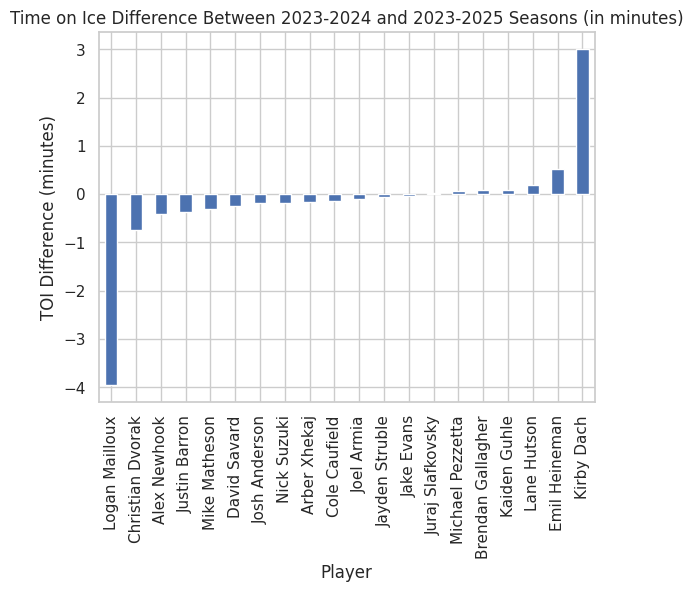

In [ ]:
### IGNORE THIS LOL

(
    stats_df
    .query("teamAbbrevs == 'MTL'")
    .pivot_table(index=["playerId", "skaterFullName", "positionCode"], columns=["seasonId"], values=["timeOnIcePerGame", "gamesPlayed"], aggfunc="sum")
    .sort_values(by=[("timeOnIcePerGame", 20242025)], ascending=False)
    .dropna()
    # .head(10)
    .assign(
        combined = lambda x: x[("timeOnIcePerGame", 20232024)] * x[("gamesPlayed", 20232024)]/  (x[("gamesPlayed", 20232024)] + x[("gamesPlayed", 20242025)] )+ x[("timeOnIcePerGame", 20242025)]*  x[("gamesPlayed", 20242025)]/(x[("gamesPlayed", 20232024)] + x[("gamesPlayed", 20242025)] ), #weighed average
        TOI_diff=lambda x: (x["combined"] - x[("timeOnIcePerGame", 20232024)]) / 60)
        # TOI_diff=lambda x: (x[("timeOnIcePerGame", 20242025)] - x[("timeOnIcePerGame", 20232024)]) / 60)
    .sort_values(by="TOI_diff", ascending=False)
    .reset_index()  # Reset index for plotting
    .plot(
        x="skaterFullName",
        y="TOI_diff",
        kind="bar",
        legend=False,
        title="Time on Ice Difference Between 2023-2024 and 2023-2025 Seasons (in minutes)",
        xlabel="Player",
        ylabel="TOI Difference (minutes)"
    ).invert_xaxis()
)


#Teams

In [ ]:
def scrapeTeams():
    """
    Scrapes team data from the NHL website. Generally to get team IDs for future use.

    Parameters :
      - None

    Returns :
      - teams_df (pd.DataFrame) : A DataFrame containing the scraped team data.

    *** It does not contain team abbreviations

    """


    url = "https://api.nhle.com/stats/rest/en/franchise?sort=fullName&include=lastSeason.id&include=firstSeason.id"

    response = requests.get(url).json()

    teams_df = pd.json_normalize(response["data"])
    teams_df = teams_df.rename(columns={"id": "teamId"})

    # Add meta data (datetime of the execution)
    teams_df["meta_datetime"] = pd.to_datetime("now")

    return teams_df

scrapeTeams().head()

,teamId,fullName,lastSeason,teamCommonName,teamPlaceName,firstSeason.id,lastSeason.id,meta_datetime
0,32,Anaheim Ducks,NaN,Ducks,Anaheim,19931994,NaN,2024-11-07 17:41:18.624032
1,28,Arizona Coyotes,NaN,Coyotes,Arizona,19791980,20232024.0,2024-11-07 17:41:18.624032
2,6,Boston Bruins,NaN,Bruins,Boston,19241925,NaN,2024-11-07 17:41:18.624032
3,8,Brooklyn Americans,NaN,Americans,Brooklyn,19251926,19411942.0,2024-11-07 17:41:18.624032
4,19,Buffalo Sabres,NaN,Sabres,Buffalo,19701971,NaN,2024-11-07 17:41:18.624032


# Schedule

In [ ]:
def scrapeSchedule(team_slug, season):
    """
    Scrapes schedule data from the NHL website for a given team and season.

    Parameters :
      - team_slug (str) : The slug of the team you want to scrape the schedule data for.
      - season (str/int) : The season you want to scrape the schedule data for in the format of "YYYYYYYY".

    Returns :
      - schedule_df (pd.DataFrame) : A DataFrame containing the scraped schedule data.

    """

    url = f"https://api-web.nhle.com/v1/club-schedule-season/{team_slug}/{season}"

    response = requests.get(url).json()

    schedule_df = pd.json_normalize(response["games"])
    schedule_df["teamAbbrev"] = team_slug

    # Add meta data (datetime of the execution)
    schedule_df["meta_datetime"] = pd.to_datetime("now")

    return schedule_df

scrapeSchedule("MTL", "20242025").head()

,id,season,gameType,gameDate,neutralSite,startTimeUTC,easternUTCOffset,venueUTCOffset,venueTimezone,gameState,gameScheduleState,tvBroadcasts,threeMinRecapFr,condensedGameFr,gameCenterLink,venue.default,awayTeam.id,awayTeam.placeName.default,awayTeam.placeName.fr,awayTeam.placeNameWithPreposition.default,awayTeam.placeNameWithPreposition.fr,awayTeam.abbrev,awayTeam.logo,awayTeam.darkLogo,awayTeam.awaySplitSquad,awayTeam.score,homeTeam.id,homeTeam.placeName.default,homeTeam.placeNameWithPreposition.default,homeTeam.placeNameWithPreposition.fr,homeTeam.abbrev,homeTeam.logo,homeTeam.darkLogo,homeTeam.homeSplitSquad,homeTeam.score,periodDescriptor.periodType,periodDescriptor.maxRegulationPeriods,gameOutcome.lastPeriodType,winningGoalie.playerId,winningGoalie.firstInitial.default,winningGoalie.lastName.default,winningGoalScorer.playerId,winningGoalScorer.firstInitial.default,winningGoalScorer.lastName.default,threeMinRecap,condensedGame,venue.fr,homeTeam.airlineLink,homeTeam.airlineDesc,winningGoalie.lastName.cs,winningGoalie.lastName.sk,homeTeam.placeName.fr,ticketsLink,ticketsLinkFr,awayTeam.radioLink,homeTeam.radioLink,homeTeam.hotelLink,homeTeam.hotelDesc,awayTeam.airlineLink,awayTeam.airlineDesc,awayTeam.hotelLink,awayTeam.hotelDesc,homeTeam.promoLink,homeTeam.promoDesc,awayTeam.promoDesc,venue.es,awayTeam.promoLink,teamAbbrev,meta_datetime
0,2024010015,20242025,1,2024-09-23,False,2024-09-23T23:00:00Z,-04:00,-04:00,America/Montreal,FINAL,OK,"[{'id': 33, 'market': 'H', 'countryCode': 'CA'...",/fr/video/recap-flyers-at-canadiens-9-23-24-63...,/fr/video/condensed-game-flyers-at-canadiens-9...,/gamecenter/phi-vs-mtl/2024/09/23/2024010015,Centre Bell,4,Philadelphia,Philadelphie,Philadelphia,de Philadelphie,PHI,https://assets.nhle.com/logos/nhl/svg/PHI_ligh...,https://assets.nhle.com/logos/nhl/svg/PHI_dark...,False,0.0,8,Montréal,Montréal,de Montréal,MTL,https://assets.nhle.com/logos/nhl/svg/MTL_ligh...,https://assets.nhle.com/logos/nhl/svg/MTL_dark...,False,5.0,REG,3,REG,8480051.0,C.,Primeau,8482134.0,L.,Tuch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MTL,2024-11-07 17:41:24.123976
1,2024010022,20242025,1,2024-09-24,False,2024-09-24T23:00:00Z,-04:00,-04:00,America/Montreal,FINAL,OK,"[{'id': 33, 'market': 'H', 'countryCode': 'CA'...",/fr/video/recap-devils-at-canadiens-9-24-24-63...,NaN,/gamecenter/njd-vs-mtl/2024/09/24/2024010022,Centre Bell,1,New Jersey,NaN,New Jersey,du New Jersey,NJD,https://assets.nhle.com/logos/nhl/svg/NJD_ligh...,https://assets.nhle.com/logos/nhl/svg/NJD_dark...,False,0.0,8,Montréal,Montréal,de Montréal,MTL,https://assets.nhle.com/logos/nhl/svg/MTL_ligh...,https://assets.nhle.com/logos/nhl/svg/MTL_dark...,False,3.0,REG,3,REG,8478470.0,S.,Montembeault,8479543.0,M.,Pezzetta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MTL,2024-11-07 17:41:24.123976
2,2024010038,20242025,1,2024-09-26,False,2024-09-26T23:00:00Z,-04:00,-04:00,America/Toronto,FINAL,OK,"[{'id': 282, 'market': 'N', 'countryCode': 'CA...",/fr/video/recap-canadiens-at-leafs-9-26-24-636...,/fr/video/condensed-game-canadiens-at-leafs-9-...,/gamecenter/mtl-vs-tor/2024/09/26/2024010038,Scotiabank Arena,8,Montréal,NaN,Montréal,de Montréal,MTL,https://assets.nhle.com/logos/nhl/svg/MTL_ligh...,https://assets.nhle.com/logos/nhl/svg/MTL_dark...,False,1.0,10,Toronto,Toronto,de Toronto,TOR,https://assets.nhle.com/logos/nhl/svg/TOR_ligh...,https://assets.nhle.com/logos/nhl/svg/TOR_dark...,False,2.0,REG,3,REG,8476932.0,A.,Stolarz,8481582.0,N.,Robertson,/video/recap-canadiens-at-leafs-9-26-24-636252...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MTL,2024-11-07 17:41:24.123976
3,2024010055,20242025,1,2024-09-28,False,2024-09-28T23:00:00Z,-04:00,-04:00,America/Montreal,FINAL,OK,"[{'id': 131, 'market': 'H', 'countryCode': 'CA...",/fr/video/recap-leafs-at-canadiens-9-28-24-636...,NaN,/gamecenter/tor-vs-mtl/2024/09/28/2024010055,Centr

# Game

## Play-by-Play

In [ ]:
def scrapePlayByPlay(gameId):

    """
    Scrapes play-by-play data from the NHL website for a given game ID.

    Parameters :
      - game_id (int) : The ID of the game you want to scrape the play-by-play data for.

      Returns :
      - pbp_df (pd.DataFrame) : A DataFrame containing the scraped play-by-play data.

    """



    url = f"https://api-web.nhle.com/v1/gamecenter/{gameId}/play-by-play"

    response = requests.get(url).json()

    pbp_df = pd.json_normalize(response["plays"])
    pbp_df["gameId"] = gameId

    # Add meta data (datetime of the execution)
    pbp_df["meta_datetime"] = pd.to_datetime("now")

    return pbp_df

pbp_df = scrapePlayByPlay(2024020170)

pbp_df.head()

,eventId,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,periodDescriptor.number,periodDescriptor.periodType,periodDescriptor.maxRegulationPeriods,details.eventOwnerTeamId,details.losingPlayerId,details.winningPlayerId,details.xCoord,details.yCoord,details.zoneCode,details.hittingPlayerId,details.hitteePlayerId,details.playerId,details.reason,details.shotType,details.shootingPlayerId,details.goalieInNetId,details.blockingPlayerId,details.awaySOG,details.homeSOG,pptReplayUrl,details.scoringPlayerId,details.scoringPlayerTotal,details.assist1PlayerId,details.assist1PlayerTotal,details.awayScore,details.homeScore,details.highlightClipSharingUrl,details.highlightClip,details.discreteClip,details.secondaryReason,details.typeCode,details.descKey,details.duration,details.committedByPlayerId,details.drawnByPlayerId,details.assist2PlayerId,details.assist2PlayerTotal,details.highlightClipSharingUrlFr,details.highlightClipFr,details.discreteClipFr,gameId,meta_datetime
0,52,00:00,20:00,1551,right,520,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024020170,2024-11-07 17:41:45.697648
1,51,00:00,20:00,1551,right,502,faceoff,11,1,REG,3,3.0,8482116.0,8476459.0,0.0,0.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024020170,2024-11-07 17:41:45.697648
2,119,00:08,19:52,1551,right,503,hit,12,1,REG,3,3.0,NaN,NaN,-96.0,17.0,N,8476459.0,8475324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024020170,2024-11-07 17:41:45.697648
3,130,00:46,19:14,1551,right,504,giveaway,22,1,REG,3,9.0,NaN,NaN,0.0,-33.0,N,NaN,NaN,8480208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024020170,2024-11-07 17:41:45.697648
4,134,01:05,18:55,1551,right,504,giveaway,24,1,REG,3,9.0,NaN,NaN,-87.0,-8.0,D,NaN,NaN,8482105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024020170,2024-11-07 17:41:45.697648


## Rosters

In [ ]:
def scrapeRosters(gameId):

    """
    Scrapes roster data from the NHL website for a given game ID.

    Parameters :
      - game_id (int) : The ID of the game you want to scrape the roster data for.

      Returns :
      - rosters_df (pd.DataFrame) : A DataFrame containing the scraped roster data.

    """



    url = f"https://api-web.nhle.com/v1/gamecenter/{gameId}/play-by-play"

    response = requests.get(url).json()

    rosters_df = pd.json_normalize(response['rosterSpots'])

    # Life's always better when you have team abbreviation in the dataframe instead of just the teamId
    abbrev_dict = {
        response['awayTeam']['id'] : response['awayTeam']['abbrev'],
        response['homeTeam']['id'] : response['homeTeam']['abbrev']
    }
    rosters_df['teamAbbrev'] = rosters_df['teamId'].map(abbrev_dict)

    rosters_df["gameId"] = gameId

    # Add meta data (datetime of the execution)
    rosters_df["meta_datetime"] = pd.to_datetime("now")


    return rosters_df

rosters_df = scrapeRosters(2024020170)
rosters_df.head()

,teamId,playerId,sweaterNumber,positionCode,headshot,firstName.default,lastName.default,lastName.cs,lastName.sk,firstName.cs,firstName.sk,lastName.de,lastName.es,lastName.fi,lastName.sv,teamAbbrev,gameId,meta_datetime
0,3,8471734,32,G,https://assets.nhle.com/mugs/nhl/20242025/NYR/...,Jonathan,Quick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYR,2024020170,2024-11-07 17:42:37.962767
1,9,8473512,28,R,https://assets.nhle.com/mugs/nhl/20242025/OTT/...,Claude,Giroux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OTT,2024020170,2024-11-07 17:42:37.962767
2,9,8474612,23,D,https://assets.nhle.com/mugs/nhl/20242025/OTT/...,Travis,Hamonic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OTT,2024020170,2024-11-07 17:42:37.962767
3,3,8475184,20,L,https://assets.nhle.com/mugs/nhl/20242025/NYR/...,Chris,Kreider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYR,2024020170,2024-11-07 17:42:37.962767
4,3,8475191,91,R,https://assets.nhle.com/mugs/nhl/20242025/NYR/...,Reilly,Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYR,2024020170,2024-11-07 17:42:37.962767


## Shifts

In [ ]:
def scrapeShifts(gameId):

    """
    Scrapes shift data from the NHL website for a given game ID.

    Parameters :
      - game_id (int) : The ID of the game you want to scrape the shift data for.

    Returns :
      - shifts_df (pd.DataFrame) : A DataFrame containing the scraped shift data.

    """


    url = f"https://api.nhle.com/stats/rest/en/shiftcharts?cayenneExp=gameId={gameId}"

    response = requests.get(url).json()

    shifts_df = pd.json_normalize(response["data"])

    # Add meta data (datetime of the execution)
    shifts_df["meta_datetime"] = pd.to_datetime("now")

    return shifts_df

shifts_df = scrapeShifts(2024020170)
shifts_df.head()

,id,detailCode,duration,endTime,eventDescription,eventDetails,eventNumber,firstName,gameId,hexValue,lastName,period,playerId,shiftNumber,startTime,teamAbbrev,teamId,teamName,typeCode,meta_datetime
0,14514533,0,00:36,01:11,None,None,104,Claude,2024020170,#C8102E,Giroux,1,8473512,1,00:35,OTT,9,Ottawa Senators,517,2024-11-07 17:43:51.504656
1,14514661,0,00:49,03:27,None,None,136,Claude,2024020170,#C8102E,Giroux,1,8473512,2,02:38,OTT,9,Ottawa Senators,517,2024-11-07 17:43:51.504656
2,14514662,0,00:33,05:36,None,None,172,Claude,2024020170,#C8102E,Giroux,1,8473512,3,05:03,OTT,9,Ottawa Senators,517,2024-11-07 17:43:51.504656
3,14514663,0,01:08,08:54,None,None,214,Claude,2024020170,#C8102E,Giroux,1,8473512,4,07:46,OTT,9,Ottawa Senators,517,2024-11-07 17:43:51.504656
4,14514965,0,01:04,11:16,None,None,253,Claude,2024020170,#C8102E,Giroux,1,8473512,5,10:12,OTT,9,Ottawa Senators,517,2024-11-07 17:43:51.504656


In [ ]:
shifts_df.query("playerId ==8473512").head()

,id,detailCode,duration,endTime,eventDescription,eventDetails,eventNumber,firstName,gameId,hexValue,lastName,period,playerId,shiftNumber,startTime,teamAbbrev,teamId,teamName,typeCode
0,14514533,0,00:36,01:11,None,None,104,Claude,2024020170,#C8102E,Giroux,1,8473512,1,00:35,OTT,9,Ottawa Senators,517
1,14514661,0,00:49,03:27,None,None,136,Claude,2024020170,#C8102E,Giroux,1,8473512,2,02:38,OTT,9,Ottawa Senators,517
2,14514662,0,00:33,05:36,None,None,172,Claude,2024020170,#C8102E,Giroux,1,8473512,3,05:03,OTT,9,Ottawa Senators,517
3,14514663,0,01:08,08:54,None,None,214,Claude,2024020170,#C8102E,Giroux,1,8473512,4,07:46,OTT,9,Ottawa Senators,517
4,14514965,0,01:04,11:16,None,None,253,Claude,2024020170,#C8102E,Giroux,1,8473512,5,10:12,OTT,9,Ottawa Senators,517


# Standings

In [ ]:
def scrapeStandings(date):
    """
    Scrapes standings data from the NHL website for a given date.

    Parameters :
      - date (str) : The date you want to scrape the standings data for in the format of "YYYY-MM-DD".

    Returns :
      - standings_df (pd.DataFrame) : A DataFrame containing the scraped standings data.

    """



    url = f"https://api-web.nhle.com/v1/standings/{date}"

    response = requests.get(url).json()

    standings_df = pd.json_normalize(response["standings"])

    # Add meta data (datetime of the execution)
    standings_df["meta_datetime"] = pd.to_datetime("now")

    return standings_df

standings_df = scrapeStandings("2024-11-06")
standings_df.head()

,conferenceAbbrev,conferenceHomeSequence,conferenceL10Sequence,conferenceName,conferenceRoadSequence,conferenceSequence,date,divisionAbbrev,divisionHomeSequence,divisionL10Sequence,divisionName,divisionRoadSequence,divisionSequence,gameTypeId,gamesPlayed,goalDifferential,goalDifferentialPctg,goalAgainst,goalFor,goalsForPctg,homeGamesPlayed,homeGoalDifferential,homeGoalsAgainst,homeGoalsFor,homeLosses,homeOtLosses,homePoints,homeRegulationPlusOtWins,homeRegulationWins,homeTies,homeWins,l10GamesPlayed,l10GoalDifferential,l10GoalsAgainst,l10GoalsFor,l10Losses,l10OtLosses,l10Points,l10RegulationPlusOtWins,l10RegulationWins,l10Ties,l10Wins,leagueHomeSequence,leagueL10Sequence,leagueRoadSequence,leagueSequence,losses,otLosses,pointPctg,points,regulationPlusOtWinPctg,regulationPlusOtWins,regulationWinPctg,regulationWins,roadGamesPlayed,roadGoalDifferential,roadGoalsAgainst,roadGoalsFor,roadLosses,roadOtLosses,roadPoints,roadRegulationPlusOtWins,roadRegulationWins,roadTies,roadWins,seasonId,shootoutLosses,shootoutWins,streakCode,streakCount,teamLogo,ties,waiversSequence,wildcardSequence,winPctg,wins,placeName.default,teamName.default,teamName.fr,teamCommonName.default,teamAbbrev.default,placeName.fr,teamCommonName.fr,meta_datetime
0,W,2,2,Western,2,1,2024-02-01,P,1,2,Pacific,2,1,2,49,59,1.204082,127,186,3.795918,24,38,56,94,4,2,38,18,16,0,18,10,12,25,37,0,2,18,8,6,0,8,2,2,5,1,11,5,0.724490,71,0.673469,33,0.612245,30,25,21,71,92,7,3,33,15,14,0,15,20232024,2,0,W,1,https://assets.nhle.com/logos/nhl/svg/VAN_ligh...,0,32,0,0.673469,33,Vancouver,Vancouver Canucks,Canucks de Vancouver,Canucks,VAN,NaN,NaN,2024-11-07 17:44:03.364389
1,E,2,2,Eastern,2,1,2024-02-01,A,2,2,Atlantic,2,1,2,49,45,0.918367,128,173,3.530612,23,32,55,87,4,3,35,15,14,0,16,10,17,23,40,1,2,16,7,5,0,7,5,4,2,2,9,9,0.724490,71,0.591837,29,0.510204,25,26,13,73,86,5,6,36,14,11,0,15,20232024,1,2,W,2,https://assets.nhle.com/logos/nhl/svg/BOS_2023...,0,31,0,0.632653,31,Boston,Boston Bruins,Bruins de Boston,Bruins,BOS,NaN,NaN,2024-11-07 17:44:03.364389
2,W,1,4,Western,6,2,2024-02-01,C,1,2,Central,4,1,2,49,37,0.755102,153,190,3.877551,25,40,69,109,5,0,40,19,18,0,20,10,12,34,46,3,0,14,6,6,0,7,1,7,13,3,14,3,0.683673,67,0.612245,30,0.571429,28,24,-3,84,81,9,3,27,11,10,0,12,20232024,1,2,W,3,https://assets.nhle.com/logos/nhl/svg/COL_ligh...,0,29,0,0.653061,32,Colorado,Colorado Avalanche,Avalanche du Colorado,Avalanche,COL,NaN,NaN,2024-11-07 17:44:03.364389
3,E,7,6,Eastern,1,2,2024-02-01,A,4,5,Atlantic,1,2,2,49,31,0.632653,127,158,3.224490,23,8,68,76,7,2,30,14,12,0,14,10,7,28,35,2,2,14,5,3,0,6,14,10,1,4,14,4,0.673469,66,0.612245,30,0.530612,26,26,23,59,82,7,2,36,16,14,0,17,20232024,1,1,W,4,https://assets.nhle.com/logos/nhl/svg/FLA_ligh...,0,28,0,0.632653,31,Florida,Florida Panthers,Panthers de la Floride,Panthers,FLA,Floride,NaN,2024-11-07 17:44:03.364389
4,W,5,3,Western,3,3,2024-02-01,C,3,1,Central,1,2,2,49,32,0.653061,151,183,3.734694,26,18,90,108,8,2,34,15,8,0,16,10,10,31,41,2,1,15,7,5,0,7,8,6,7,5,13,6,0.673469,66,0.571429,28,0.428571,21,23,14,61,75,5,4,32,13,13,0,14,20232024,1,2,W,3,https://assets.nhle.com/logos/nhl/svg/DAL_ligh...,0,27,0,0.612245,30,Dallas,Dallas Stars,Stars de Dallas,Stars,DAL,NaN,NaN,2024-11-07 17:44:03.364389


# Player

In [ ]:
def scrapePlayer(playerId, key=None):

    """
    Scrapes player data from the NHL website for a given player ID.

    Parameters :
      - playerId (int) : The ID of the player you want to scrape the data for.
      - key (str) : The key to use to extract the data from the response.

    Returns :
      - response (dict) : A dictionary containing the scraped player data.

      Data in dict :
        - playerId
        - isActive
        - currentTeamId
        - currentTeamAbbrev
        - fullTeamName
        - teamCommonName
        - teamPlaceNameWithPreposition
        - firstName
        - lastName
        - teamLogo
        - sweaterNumber
        - position
        - headshot
        - heroImage
        - heightInInches
        - heightInCentimeters
        - weightInPounds
        - weightInKilograms
        - birthDate
        - birthCity
        - birthStateProvince
        - birthCountry
        - shootsCatches
        - draftDetails
        - playerSlug
        - inTop100AllTime
        - inHHOF
        - featuredStats
        - careerTotals
        - shopLink
        - twitterLink
        - watchLink
        - last5Games
        - seasonTotals
        - currentTeamRoster

    """


    url = f"https://api-web.nhle.com/v1/player/{playerId}/landing"

    response = requests.get(url).json()

    if key in response.keys():
        response = response[key]
    else:
        response = response

    return response

pd.json_normalize(scrapePlayer(8481540, 'seasonTotals'))

,assists,gameTypeId,gamesPlayed,goals,leagueAbbrev,pim,points,season,sequence,teamName.default,plusMinus,avgToi,faceoffWinningPctg,gameWinningGoals,otGoals,powerPlayGoals,powerPlayPoints,shootingPctg,shorthandedGoals,shorthandedPoints,shots,teamCommonName.default,teamName.fr,teamPlaceNameWithPreposition.default,teamPlaceNameWithPreposition.fr
0,9,2,6,9,Brick Invitational,4.0,18,20102011,128836,Chicago Jr. Blackhawks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,3,6,9,Brick Invitational,4.0,18,20102011,129687,Chicago Jr. Blackhawks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2,19,18,HPMBHL,4.0,27,20142015,141486,Team Illinois Bantam Minor AAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33,2,23,25,USHS-WI,6.0,58,20152016,91191,Stevens Point Area High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31,2,37,23,14U AAA,NaN,54,20152016,192638,Team Wisconsin 14U AAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,3,2,4,USHS-WI,0.0,6,20152016,91191,Stevens Point Area High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,29,2,22,50,USHS-WI,17.0,79,20162017,91191,Stevens Point Area High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,2,14,4,UMHSEHL,2.0,6,20162017,97958,Team Wisconsin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2,2,3,2,USA-S15,NaN,4,20162017,178263,Team Royal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5,3,3,3,USHS-WI,2.0,8,20162017,91191,Stevens Point Area High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# NHLEdge

## Skater

### Overview

In [ ]:
def get_player_overview(season, session, playerId):

    """

    Scrapes overview data from the NHL website (NHL Edge) for a given player.

    Parameters :
      - season (str/int) : The season you want to scrape the overview data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the overview data for.
      - playerId (int) : The ID of the player you want to scrape the overview data for.

    Returns :
      - overview_df (pd.DataFrame) : A DataFrame containing the scraped overview data.

      * Percentile is assuming the size of the radar is 90 units.

    """



    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Construct the URL
    url = f"https://edge.nhl.com/en/skater/{season}-{session}-{playerId}"

    # Open the page
    driver.get(url)

    # Define headers and metrics
    headers = ['Metric', 'Value', 'League average by position (F/D)', 'Percentile']
    metrics = ['Top Skating Speed (mph)', 'Speed Bursts Over 20 mph', "Skating Distance (mi)",
               "Top Shot Speed (mph)", "Shots on Goal", "Shooting %", "Goals", "Off. Zone Time (ES)"]


    # Initialize the dictionary to hold metrics
    metrics_dict = {}

    try:
        # Wait until the JavaScript-rendered element with data-section="overview" loads
        overview_section = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, '[data-section="overview"]'))
        )

        # Get the text from the overview section
        overview_text = overview_section.text

        # Wait until the JavaScript-rendered elements with the specified class are loaded
        radar_elements = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, '.sl-webc__radar-chart__area-datum'))
        )

        # Loop through each radar element and associated metric
        for element, metric in zip(radar_elements, metrics):
            # Initialize dictionary for each metric if not already done
            metrics_dict[metric] = {}

            # Get the cx and cy attributes, and convert them to float
            metrics_dict[metric]["x"] = float(element.get_attribute("cx"))
            metrics_dict[metric]["y"] = float(element.get_attribute("cy"))

    finally:
        # Close the driver
        driver.quit()



    # Process each line to split the values and prepare for DataFrame
    data = overview_text.split("\n")[3:11]
    processed_data = []
    for line, metric in zip(data, metrics):
        line1 = line.strip(metric + " ")
        parts = line1.split(" ")
        val = float(parts[0].replace("%", ""))/100 if "%" in parts[0] else float(parts[0])
        pos_avg = float(parts[1].replace("%", ""))/100 if "%" in parts[1] else float(parts[1])
        percentile = "Below 50th" if parts[2].isalpha() else float(parts[2])

        # Append processed row
        processed_data.append([metric, val, pos_avg, percentile])

    # Create DataFrame
    overview_df = pd.DataFrame(processed_data, columns=headers)

    ov_df = pd.DataFrame(metrics_dict).T
    ov_df['Distance from centre'] = np.sqrt((ov_df["x"] - 0)**2 + (ov_df["y"] - 0)**2)
    ov_df["Percentile estimation"] = np.minimum((ov_df['Distance from centre'] / 90) * 100, 100)
    ov_df = ov_df.reset_index().rename(columns={"index": "Metric"})

    # Join ov_df on overview_df on 'Label' column
    overview_df = overview_df.merge(ov_df, on='Metric', how='left')


    # Identifyer columns
    overview_df["season"] = season
    overview_df["session"] = session
    overview_df["playerId"] = playerId



    # Add meta data (datetime of the execution)
    overview_df["meta_datetime"] = pd.to_datetime("now")

    return overview_df

get_player_overview(20242025, "regular", 8473512)


,Metric,Value,League average by position (F/D),Percentile,x,y,Distance from centre,Percentile estimation,season,session,playerId,meta_datetime
0,Top Skating Speed (mph),22.220,21.750,77.0,4.211722e-15,-6.878265e+01,68.782647,76.425163,20242025,regular,8473512,2024-11-08 13:41:21.374938
1,Speed Bursts Over 20 mph,13.000,17.000,Below 50th,3.031897e+01,-3.031897e+01,42.877494,47.641660,20242025,regular,8473512,2024-11-08 13:41:21.374938
2,Skating Distance (mi),38.890,27.590,72.0,6.431624e+01,0.000000e+00,64.316241,71.462490,20242025,regular,8473512,2024-11-08 13:41:21.374938
3,Top Shot Speed (mph),72.920,81.170,Below 50th,1.263290e+00,1.263290e+00,1.786562,1.985069,20242025,regular,8473512,2024-11-08 13:41:21.374938
4,Shots on Goal,28.000,19.000,75.0,4.102327e-15,6.699608e+01,66.996085,74.440094,20242025,regular,8473512,2024-11-08 13:41:21.374938
5,Shooting %,0.179,0.115,83.0,-5.242655e+01,5.242655e+01,74.142334,82.380371,20242025,regular,8473512,2024-11-08 13:41:21.374938
6,Goals,5.000,2.000,86.0,-7.682218e+01,9.408003e-15,76.822177,85.357974,20242025,regular,8473512,2024-11-08 13:41:21.374938
7,Off. Zone Time (ES),0.401,0.408,Below 50th,-2.526581e+01,-2.526581e+01,35.731245,39.701383,20242025,regular,8473512,2024-11-08 13:41:21.374938


### Speed

In [ ]:
def get_player_speed(season, session, playerId):

    """

    Scrapes speed data from the NHL website (NHL Edge) for a given player.

    Parameters:
      - season (str/int) : The season you want to scrape the speed data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the speed data for.
      - playerId (int) : The ID of the player you want to scrape the speed data for.

    Returns:
      - speed_df (pd.DataFrame) : A DataFrame containing the scraped speed data.

    """


    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Example URL
    url = f"https://edge.nhl.com/en/skater/{season}-{session}-{playerId}"


    # Open the page
    driver.get(url)

    try:
        # Wait until the JavaScript-rendered element with data-section="overview" loads
        speed_section = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//*[@id="skatingspeed-section-content"]/div[1]/div/table/tbody'))
        )
        # Get the text from the overview section
        speed_text = speed_section.text
        # print(speed_text)
    finally:
        # Close the driver
        driver.quit()

    headers = ['Metric', 'Value', 'League average by position (F/D)', 'Percentile']
    metrics = ['Top Speed (mph)', "22+ mph bursts", "20-22 mph bursts", "18-20 mph bursts"]
    data = speed_text.split("\n")

    # Process each line to split the values and prepare for DataFrame
    processed_data = []
    for line, metric  in zip(data, metrics):
        line1 = line.replace(metric + " ", "")
        parts = line1.split(" ")
        val = float(parts[0].replace("%", ""))/100 if "%" in parts[0] else float(parts[0])
        pos_avg = float(parts[1].replace("%", ""))/100 if "%" in parts[1] else float(parts[1])
        percentile = "Below 50th" if parts[2].isalpha() else float(parts[2])

        # Append processed row
        processed_data.append([metric, val, pos_avg, percentile])

    # Create DataFrame
    speed_df = pd.DataFrame(processed_data, columns=headers)

    # Identifyer columns
    speed_df["season"] = season
    speed_df["session"] = session
    speed_df["playerId"] = playerId

    # Add meta data (datetime of the execution)
    speed_df["meta_datetime"] = pd.to_datetime("now")

    return speed_df


get_player_speed(20242025, "regular", 8473512)



,Label,Value,League average by position (F/D),Percentile,season,session,playerId,meta_datetime
0,Top Speed (mph),22.22,21.73,77.0,20242025,regular,8473512,2024-11-07 18:26:13.678472
1,22+ mph bursts,2.00,0.00,88.0,20242025,regular,8473512,2024-11-07 18:26:13.678472
2,20-22 mph bursts,8.00,15.00,Below 50th,20242025,regular,8473512,2024-11-07 18:26:13.678472
3,18-20 mph bursts,68.00,64.00,57.0,20242025,regular,8473512,2024-11-07 18:26:13.678472


### Distance skated

In [ ]:
def get_player_distance_overview(season, session, playerId):

    """

    Scrapes distance skated data from the NHL website (NHL Edge) for a given player.

    Parameters:
      - season (str/int) : The season you want to scrape the distance skated data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the distance skated data for.
      - playerId (int) : The ID of the player you want to scrape the distance skated data for.

    Returns:
      - distance_df (pd.DataFrame) : A DataFrame containing the scraped distance skated data.

    """



    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Example URL
    url = f"https://edge.nhl.com/en/skater/{season}-{session}-{playerId}"

    # Open the page
    driver.get(url)

    # Define the XPaths for each strength type button
    strength_buttons = {
        "All Strengths": '//*[@id="manpower-selector-skatingdistance"]/label[1]',
        "Even Strength": '//*[@id="manpower-selector-skatingdistance"]/label[2]',
        "Power Play": '//*[@id="manpower-selector-skatingdistance"]/label[3]',
        "Penalty Kill": '//*[@id="manpower-selector-skatingdistance"]/label[4]'
    }

    headers = ['Metric', 'Value', 'League average by position (F/D)', 'Percentile']
    metrics = ['Total (mi)', "Average Per 60 (mi)", "Top Game (mi)", "Top Period (mi)"]

    df_list = []
    failed_list = []
    try:
        # Try to close any overlay that might interfere with the click
        try:
            close_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, '//*[@id="close-modal-button"]'))
            )
            close_button.click()
        except:
            pass  # Continue if no overlay is present

        # Loop through each button and gather data
        for strength, xpath in strength_buttons.items():
            # Locate the button each time in the loop to avoid stale references
            button = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, xpath))
            )

            # Scroll the button into view and click
            driver.execute_script("arguments[0].scrollIntoView(true);", button)
            time.sleep(3)  # Short delay for stability
            driver.execute_script("arguments[0].click();", button)

            # Reinitialize the data section locator and wait for it to update
            try:
                # Wait until the data content is visible and contains updated content
                data_section_xpath = '//*[@id="skatingdistance-section-content"]/div[1]/div/table/tbody'
                WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.XPATH, data_section_xpath))
                )

                # Extract and print data for the current strength type
                distance_section = driver.find_element(By.XPATH, data_section_xpath)
                distance_text = distance_section.text
                # print(f"{strength} Stats:\n", distance_text, "\n")
                time.sleep(3)  # Short delay before moving to the next button

                data = distance_text.split("\n")
                processed_data = []
                for line, metric  in zip(data, metrics):
                    line1 = line.replace(metric + " ", "")
                    parts = line1.split(" ")
                    val = float(parts[0].replace("%", ""))/100 if "%" in parts[0] else float(parts[0])
                    pos_avg = float(parts[1].replace("%", ""))/100 if "%" in parts[1] else float(parts[1])
                    percentile = "Below 50th" if parts[2].isalpha() else float(parts[2])

                    # Append processed row
                    processed_data.append([metric, val, pos_avg, percentile])


                # Create DataFrame
                distance_df = pd.DataFrame(processed_data, columns=headers)
                distance_df['Strength'] = strength
                # print(distance_df)

                df_list.append(distance_df)



            except Exception as inner_e:
                print(f"An error occurred while trying to retrieve stats for {strength}: {inner_e}")
                failed_list.append(strength)

    except Exception as e:
        print("An error occurred:", str(e))

    finally:
        driver.quit()
        distance_dfs = pd.concat(df_list, ignore_index=True).reset_index(drop=True)

    print(f"Failed to retrieve data for: {failed_list}") if len(failed_list) > 0 else None

    distance_dfs["season"] = season
    distance_dfs["session"] = session
    distance_dfs["playerId"] = playerId

    # Add meta data (datetime of the execution)
    distance_dfs["meta_datetime"] = pd.to_datetime("now")

    return distance_dfs

get_player_distance_overview(20242025, "regular", 8473512)

,Metric,Value,League average by position (F/D),Percentile,Strength,season,session,playerId,meta_datetime
0,Total (mi),38.89,27.59,72.0,All Strengths,20242025,regular,8473512,2024-11-08 20:42:56.419896
1,Average Per 60 (mi),9.52,9.71,56.0,All Strengths,20242025,regular,8473512,2024-11-08 20:42:56.419896
2,Top Game (mi),3.62,2.81,80.0,All Strengths,20242025,regular,8473512,2024-11-08 20:42:56.419896
3,Top Period (mi),1.33,1.09,76.0,All Strengths,20242025,regular,8473512,2024-11-08 20:42:56.419896
4,Total (mi),30.55,23.57,61.0,Even Strength,20242025,regular,8473512,2024-11-08 20:42:56.419896
5,Average Per 60 (mi),9.68,9.91,51.0,Even Strength,20242025,regular,8473512,2024-11-08 20:42:56.419896
6,Top Game (mi),2.98,2.51,69.0,Even Strength,20242025,regular,8473512,2024-11-08 20:42:56.419896
7,Top Period (mi),1.30,1.01,85.0,Even Strength,20242025,regular,8473512,2024-11-08 20:42:56.419896
8,Total (mi),4.15,2.63,69.0,Power Play,20242025,regular,8473512,2024-11-08 20:42:56.419896
9,Average Per 60 (mi),9.40,7.96,73.0,Power Play,20242025,regular,8473512,2024-11-08 20:42:56.419896


In [ ]:
def get_player_distance(season, session, playerId):

    """

    Scrapes distance skated per game data from the NHL website (NHL Edge) for a given player.

    Parameters:
      - season (str/int) : The season you want to scrape the distance skated data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the distance skated data for.
      - playerId (int) : The ID of the player you want to scrape the distance skated data for.


    Returns:
      - dis_dfs (pd.DataFrame) : A DataFrame containing the scraped distance skated per game data.

    """


    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Example URL
    url = f"https://edge.nhl.com/en/skater/{season}-{session}-{playerId}"

    # Open the page
    driver.get(url)

    # Define the XPaths for each strength type button
    strength_buttons = {
        "All Strengths": '//*[@id="manpower-selector-skatingdistance"]/label[1]',
        "Even Strength": '//*[@id="manpower-selector-skatingdistance"]/label[2]',
        "Power Play": '//*[@id="manpower-selector-skatingdistance"]/label[3]',
        "Penalty Kill": '//*[@id="manpower-selector-skatingdistance"]/label[4]'
    }

    # headers = ['Label', 'Value', 'League average by position (F/D)', 'Percentile']
    # metrics = ['Total (mi)', "Average Per 60 (mi)", "Top Game (mi)", "Top Period (mi)"]

    df_list = []
    failed_list = []

    try:
        # Try to close any overlay that might interfere with the click
        try:
            close_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, '//*[@id="close-modal-button"]'))
            )
            close_button.click()
        except:
            pass  # Continue if no overlay is present

        # Loop through each button and gather data
        for strength, xpath in strength_buttons.items():
            # Locate the button each time in the loop to avoid stale references
            button = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, xpath))
            )

            # Scroll the button into view and click
            driver.execute_script("arguments[0].scrollIntoView(true);", button)
            time.sleep(3)  # Short delay for stability
            driver.execute_script("arguments[0].click();", button)

            # Reinitialize the data section locator and wait for it to update
            try:
              # Wait until the element with the data-json attribute is present
              chart_element = WebDriverWait(driver, 10).until(
                  EC.presence_of_element_located((By.XPATH, '//*[@id="skatingdistance-datebarchart"]'))
              )


              # Extract the data-json attribute
              data_json = chart_element.get_attribute("data-json")

              # Parse the JSON data if you need it as a dictionary
              data_dict = json.loads(data_json)

              # Print the extracted data
              # print("Extracted JSON data:", data_dict)


              dis_df = pd.json_normalize(data_dict['chartData'])
              dis_df['Distance skated (mi)'] = [float(data_dict['chartData'][i]["tooltip"][0].replace("Distance skated: ", "").replace(" miles", "")) for i in range(len(data_dict['chartData']))]
              dis_df['opponent'] = [data_dict['chartData'][i]["tooltip"][1].split(" @ ")[1] if " @ " in data_dict['chartData'][i]["tooltip"][1] else data_dict['chartData'][i]["tooltip"][1].split(" vs ")[1] for i in range(len(data_dict['chartData']))]
              dis_df["Home/Away"] = ["Home" if " vs "  in data_dict['chartData'][i]["tooltip"][1] else "Away" for i in range(len(data_dict['chartData']))]
              dis_df["TOI"] = [data_dict['chartData'][i]["tooltip"][2].replace("TOI: ", "") for i in range(len(data_dict['chartData']))]
              dis_df = dis_df.drop(columns=['tooltip', 'value'])

              dis_df['Strength'] = strength
              # print(dis_df)

              df_list.append(dis_df)
              # time.sleep(5)  # Short delay before moving to the next button



            except Exception as inner_e:
                print(f"An error occurred while trying to retrieve stats for {strength}: {inner_e}")
                failed_list.append(strength)

    except Exception as e:
        print('Error with', strength.upper(), ':', str(e))


    finally:
        driver.quit()

    print(f"Failed to retrieve data for: {failed_list}") if len(failed_list) > 0 else None

    dis_dfs = pd.concat(df_list, ignore_index=True).reset_index(drop=True)
    dis_dfs["season"] = season
    dis_dfs["session"] = session
    dis_dfs["playerId"] = playerId

    # Add meta data (datetime of the execution)
    dis_dfs["meta_datetime"] = pd.to_datetime("now")

    return dis_dfs


get_player_distance(20242025, "regular", 8476875)


,date,Distance skated (mi),opponent,Home/Away,TOI,Strength,season,session,playerId,meta_datetime
0,2024-11-07,3.26,NJD,Away,22:27,All Strengths,20242025,regular,8476875,2024-11-08 21:10:48.834039
1,2024-11-05,3.77,CGY,Home,26:23,All Strengths,20242025,regular,8476875,2024-11-08 21:10:48.834039
2,2024-11-02,3.87,PIT,Away,25:41,All Strengths,20242025,regular,8476875,2024-11-08 21:10:48.834039
3,2024-10-31,2.44,WSH,Away,27:46,All Strengths,20242025,regular,8476875,2024-11-08 21:10:48.834039
4,2024-10-29,2.96,SEA,Home,21:14,All Strengths,20242025,regular,8476875,2024-11-08 21:10:48.834039
5,2024-10-27,3.40,PHI,Away,24:58,All Strengths,20242025,regular,8476875,2024-11-08 21:10:48.834039
6,2024-10-26,3.30,STL,Home,22:42,All Strengths,20242025,regular,8476875,2024-11-08 21:10:48.834039
7,2024-10-22,2.63,NYR,Home,16:47,All Strengths,20242025,regular,8476875,2024-11-08 21:10:48.834039
8,2024-10-19,3.65,NYI,Away,28:10,All Strengths,20242025,regular,8476875,2024-11-08 21:10:48.834039
9,2024-10-17,1.05,LAK,Home,7:35,All Strengths,20242025,regular,8476875,2024-11-08 21:10:48.834039


### Shot speed

In [ ]:
def get_shot_speed(season, session, playerId):

    """

    Scrapes shot speed data from the NHL website (NHL Edge) for a given player.

    Parameters:
      - season (str/int) : The season you want to scrape the distance skated data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the distance skated data for.
      - playerId (int) : The ID of the player you want to scrape the distance skated data for.

    Returns:
      - shot_speed_df (pd.DataFrame) : A DataFrame containing the scraped shot speed data.


    """

    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Example URL
    url = f"https://edge.nhl.com/en/skater/{season}-{session}-{playerId}"


    # Open the page
    driver.get(url)

    try:
        # Wait until the JavaScript-rendered element with data-section="overview" loads
        shot_speed_section = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//*[@id="shotspeed-section-content"]/div[1]/div/table'))
        )
        # Get the text from the overview section
        shot_speed_text = shot_speed_section.text

        data = shot_speed_text.split("\n")[2:]
        headers = ['Metric', 'Value', 'League average by position (F/D)', 'Percentile']
        metrics = ['Top Speed (mph)', 'Average Speed (mph)', '100+ mph shots', '90-100 mph shots', '80-90 mph shots', '70-80 mph shots']

        processed_data = []
        for line, metric  in zip(data, metrics):
            line1 = line.replace(metric + " ", "")
            parts = line1.split(" ")
            league_avg = parts[0]
            pos_avg = parts[1]
            percentile = "Below 50th" if parts[2].isalpha() else parts[2]

            # Append processed row
            processed_data.append([metric, league_avg, pos_avg, percentile])

        # Create DataFrame
        shot_speed_df = pd.DataFrame(processed_data, columns=headers)
        shot_speed_df["season"] = season
        shot_speed_df["session"] = session
        shot_speed_df["playerId"] = playerId

        # Add meta data (datetime of the execution)
        shot_speed_df["meta_datetime"] = pd.to_datetime("now")


    finally:
        # Close the driver
        driver.quit()


    return shot_speed_df

get_shot_speed(20242025, "regular", 8473512)

,Metric,Value,League average by position (F/D),Percentile,season,session,playerId,meta_datetime
0,Top Speed (mph),72.92,80.86,Below 50th,20242025,regular,8473512,2024-11-07 23:33:29.800279
1,Average Speed (mph),50.35,51.97,Below 50th,20242025,regular,8473512,2024-11-07 23:33:29.800279
2,100+ mph shots,0,0,Below 50th,20242025,regular,8473512,2024-11-07 23:33:29.800279
3,90-100 mph shots,0,0,Below 50th,20242025,regular,8473512,2024-11-07 23:33:29.800279
4,80-90 mph shots,0,1,Below 50th,20242025,regular,8473512,2024-11-07 23:33:29.800279
5,70-80 mph shots,2,6,Below 50th,20242025,regular,8473512,2024-11-07 23:33:29.800279


### Shot locations

In [ ]:
def get_shot_location_overview(season, session, playerId):

    """

    Scrapes shot location overview data from the NHL website (NHL Edge) for a given player.

    Parameters:
      - season (str/int) : The season you want to scrape the distance skated data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the distance skated data for.
      - playerId (int) : The ID of the player you want to scrape the distance skated data for.

    Returns:
      - shot_location_df (pd.DataFrame) : A DataFrame containing the scraped shot location overview data.


    """


    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Example URL
    url = f"https://edge.nhl.com/en/skater/{season}-{session}-{playerId}"

    # Open the page
    driver.get(url)



    location_buttons = {
        "All locations" : '//*[@id="shotlocation-selector-shotlocation"]/label[1]',
        "High-Danger" : '//*[@id="shotlocation-selector-shotlocation"]/label[2]',
        "Mid-Range" : '//*[@id="shotlocation-selector-shotlocation"]/label[3]',
        "Long-Range" : '//*[@id="shotlocation-selector-shotlocation"]/label[4]'

    }

    headers = ['Metric', 'Value', 'League average by position (F/D)', 'Percentile']
    metrics = ['Shots on Goal', "Goals", "Shooting %"]

    df_list = []
    failed_list = []
    try:
        # Try to close any overlay that might interfere with the click
        try:
            close_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, '//*[@id="close-modal-button"]'))
            )
            close_button.click()
        except:
            pass  # Continue if no overlay is present

        # Loop through each button and gather data
        for location, xpath in location_buttons.items():
            # Locate the button each time in the loop to avoid stale references
            button = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, xpath))
            )

            # Scroll the button into view and click
            driver.execute_script("arguments[0].scrollIntoView(true);", button)
            time.sleep(3)  # Short delay for stability
            driver.execute_script("arguments[0].click();", button)

            # Reinitialize the data section locator and wait for it to update
            try:
                # Wait until the data content is visible and contains updated content
                data_section_xpath = '//*[@id="shotlocation-section-content"]/div[1]/div/table/tbody'
                WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.XPATH, data_section_xpath))
                )

                # Extract and print data for the current strength type
                shot_location_section = driver.find_element(By.XPATH, data_section_xpath)
                shot_location_text = shot_location_section.text
                # print(f"{strength} Stats:\n", distance_text, "\n")
                time.sleep(3)  # Short delay before moving to the next button

                data = shot_location_text.split("\n")
                processed_data = []
                for line, metric  in zip(data, metrics):
                    line1 = line.replace(metric + " ", "")
                    parts = line1.split(" ")
                    val = float(parts[0].replace("%", ""))/100 if "%" in parts[0] else parts[0]
                    pos_avg = float(parts[1].replace("%", ""))/100 if "%" in parts[1] else parts[1]
                    percentile = "Below 50th" if parts[2].isalpha() else parts[2]

                    # Append processed row
                    processed_data.append([metric, val, pos_avg, percentile])

                # Create DataFrame
                shot_location_df = pd.DataFrame(processed_data, columns=headers)
                shot_location_df['Shot location'] = location
                # print(distance_df)

                df_list.append(shot_location_df)
                # print(data)



            except Exception as inner_e:
                print(f"An error occurred while trying to retrieve stats for {location}: {inner_e}")
                failed_list.append(location)

    except Exception as e:
        print("An error occurred:", str(e))

    finally:
        driver.quit()

    shot_location_dfs = pd.concat(df_list, ignore_index=True).reset_index(drop=True)

    print(f"Failed to retrieve data for: {failed_list}") if len(failed_list) > 0 else None

    shot_location_dfs["season"] = season
    shot_location_dfs["session"] = session
    shot_location_dfs["playerId"] = playerId

    # Add meta data (datetime of the execution)
    shot_location_dfs["meta_datetime"] = pd.to_datetime("now")

    return shot_location_dfs



get_shot_location_overview(20232024, "regular", 8473512)

,Metric,Value,League average by position (F/D),Percentile,Shot location,season,session,playerId,meta_datetime
0,Shots on Goal,25,18,71,All locations,20232024,regular,8473512,2024-11-07 23:57:53.218782
1,Goals,5,2,87,All locations,20232024,regular,8473512,2024-11-07 23:57:53.218782
2,Shooting %,0.2,0.116,86,All locations,20232024,regular,8473512,2024-11-07 23:57:53.218782
3,Shots on Goal,25,18,71,High-Danger,20232024,regular,8473512,2024-11-07 23:57:53.218782
4,Goals,5,2,87,High-Danger,20232024,regular,8473512,2024-11-07 23:57:53.218782
5,Shooting %,0.2,0.116,86,High-Danger,20232024,regular,8473512,2024-11-07 23:57:53.218782
6,Shots on Goal,5,6,55,Mid-Range,20232024,regular,8473512,2024-11-07 23:57:53.218782
7,Goals,3,1,88,Mid-Range,20232024,regular,8473512,2024-11-07 23:57:53.218782
8,Shooting %,0.6,0.178,96,Mid-Range,20232024,regular,8473512,2024-11-07 23:57:53.218782
9,Shots on Goal,7,5,72,Long-Range,20232024,regular,8473512,2024-11-07 23:57:53.218782


In [ ]:
def get_shot_location(season, session, playerId):

    """

    Scrapes shot location data from the NHL website (NHL Edge) for a given player.


    Parameters:
      - season (str/int) : The season you want to scrape the distance skated data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the distance skated data for.
      - playerId (int) : The ID of the player you want to scrape the distance skated data for.



    Returns:
      - shot_location_df (pd.DataFrame) : A DataFrame containing the scraped shot location data.

    """


    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Example URL
    url = f"https://edge.nhl.com/en/skater/{season}-{session}-{playerId}"

    # Open the page
    driver.get(url)

    # Define the XPaths for each metric type button
    metric_buttons = {
        "Shots on Goal": '//*[@id="shootingmetrics-selector-shotlocation"]/label[1]',
        "Goals": '//*[@id="shootingmetrics-selector-shotlocation"]/label[2]',
        "Shooting%": '//*[@id="shootingmetrics-selector-shotlocation"]/label[3]'
    }

    location_buttons = {
        "All locations" : '//*[@id="shotlocation-selector-shotlocation"]/label[1]',
        "High-Danger" : '//*[@id="shotlocation-selector-shotlocation"]/label[2]',
        "Mid-Range" : '//*[@id="shotlocation-selector-shotlocation"]/label[3]',
        "Long-Range" : '//*[@id="shotlocation-selector-shotlocation"]/label[4]'

    }



    df_list = []
    failed_list = []

    try:
        # Try to close any overlay that might interfere with the click
        try:
            close_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, '//*[@id="close-modal-button"]'))
            )
            close_button.click()
        except:
            pass  # Continue if no overlay is present

        # Loop through each button and gather data
        for metric, xpath_metric in metric_buttons.items():
            for location, xpath_location in location_buttons.items():


                # Locate the button each time in the loop to avoid stale references
                button_metric = WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.XPATH, xpath_metric))
                )

                # Scroll the button into view and click
                driver.execute_script("arguments[0].scrollIntoView(true);", button_metric)
                time.sleep(3)  # Short delay for stability
                driver.execute_script("arguments[0].click();", button_metric)


                # Locate the button each time in the loop to avoid stale references
                button_location = WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.XPATH, xpath_location))
                )

                # Scroll the button into view and click
                driver.execute_script("arguments[0].scrollIntoView(true);", button_location)
                time.sleep(3)  # Short delay for stability
                driver.execute_script("arguments[0].click();", button_location)

                # Reinitialize the data section locator and wait for it to update
                try:
                  # Wait until the element with the data-json attribute is present
                  chart_element = WebDriverWait(driver, 10).until(
                      EC.presence_of_element_located((By.XPATH, '//*[@id="shotlocation-shotchart"]'))
                  )


                  # Extract the data-json attribute
                  data_json = chart_element.get_attribute("data-json")

                  # Parse the JSON data if you need it as a dictionary
                  data_dict = json.loads(data_json)

                  # Print the extracted data
                  # print("Extracted JSON data:", data_dict)

                  sl_df = pd.json_normalize(data_dict['chartData'])
                  sl_df['Location'] = location
                  sl_df['Metric'] = metric

                  df_list.append(sl_df)
                  time.sleep(5)  # Short delay before moving to the next button






                except Exception as inner_e:
                    print(f"An error occurred while trying to retrieve stats for {metric} - {location}: {inner_e}")
                    failed_list.append((metric, location))

    except Exception as e:
        print('Error with', metric, "-", location, ':', str(e))


    finally:
        driver.quit()


    sl_dfs = pd.concat(df_list, ignore_index=True).reset_index(drop=True)
    sl_dfs["season"] = season
    sl_dfs["session"] = session
    sl_dfs["playerId"] = playerId

    # Add meta data (datetime of the execution)
    sl_dfs["meta_datetime"] = pd.to_datetime("now")


    print(f"Failed to retrieve data for: {failed_list}") if len(failed_list) > 0 else None

    return sl_dfs

get_shot_location(20232024, "regular", 8473512)


,value,zone,zoneThresholds,valueLabel,Location,Metric,tooltipContent,season,session,playerId,meta_datetime
0,1.048806,Crease,"[-2, -1, 1, 2]",6,All locations,Shots on Goal,NaN,20232024,regular,8473512,2024-11-08 00:59:25.885544
1,0.540651,RNetSide,"[-2, -1, 1, 2]",5,All locations,Shots on Goal,NaN,20232024,regular,8473512,2024-11-08 00:59:25.885544
2,1.091442,LowSlot,"[-2, -1, 1, 2]",46,All locations,Shots on Goal,NaN,20232024,regular,8473512,2024-11-08 00:59:25.885544
3,0.893802,LNetSide,"[-2, -1, 1, 2]",6,All locations,Shots on Goal,NaN,20232024,regular,8473512,2024-11-08 00:59:25.885544
4,2.219144,RCircle,"[-2, -1, 1, 2]",29,All locations,Shots on Goal,NaN,20232024,regular,8473512,2024-11-08 00:59:25.885544
...,...,...,...,...,...,...,...,...,...,...,...
80,1.000000,Crease,"[1, 2, 3, 4]",16.7,Mid-Range,Shooting%,NaN,20232024,regular,8473512,2024-11-08 00:59:25.885544
81,3.000000,LowSlot,"[1, 2, 3, 4]",21.7,Mid-Range,Shooting%,NaN,20232024,regular,8473512,2024-11-08 00:59:25.885544
82,3.000000,RCircle,"[1, 2, 3, 4]",10.3,Long-Range,Shooting%,NaN,20232024,regular,8473512,2024-11-08 00:59:25.885544
83,2.000000,HighSlot,"[1, 2, 3, 4]",15.4,Long-Range,Shooting%,NaN,20232024,regular,8473512,2024-11-08 00:59:25.885544


### Zone TOI

In [ ]:
def get_zone_toi(season, session, playerId):

    """

    Scrapes zone TOI % per strength data from the NHL website (NHL Edge) for a given player.


    Parameters:
      - season (str/int) : The season you want to scrape the distance skated data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the distance skated data for.
      - playerId (int) : The ID of the player you want to scrape the distance skated data for.

    Returns:
      - zone_toi_df (pd.DataFrame) : A DataFrame containing the scraped zone TOI data.

    """




    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Example URL
    url = f"https://edge.nhl.com/en/skater/{season}-{session}-{playerId}"

    # Open the page
    driver.get(url)

    # Define the XPaths for each strength type button
    strength_buttons = {
        "All Strengths": '//*[@id="manpower-selector-zonetime"]/label[1]',
        "Even Strength": '//*[@id="manpower-selector-zonetime"]/label[2]',
        "Power Play": '//*[@id="manpower-selector-zonetime"]/label[3]',
        "Penalty Kill": '//*[@id="manpower-selector-zonetime"]/label[4]'
    }

    headers = ['Zone', 'Value', 'League average by position (F/D)', 'Percentile']
    metrics = ['Offensive Zone', "Neutral Zone", "Defensive Zone"]

    df_list = []
    failed_list = []

    try:
        # Try to close any overlay that might interfere with the click
        try:
            close_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, '//*[@id="close-modal-button"]'))
            )
            close_button.click()
        except:
            pass  # Continue if no overlay is present

        # Loop through each button and gather data
        for strength, xpath in strength_buttons.items():
            # Locate the button each time in the loop to avoid stale references
            button = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, xpath))
            )

            # Scroll the button into view and click
            driver.execute_script("arguments[0].scrollIntoView(true);", button)
            time.sleep(3)  # Short delay for stability
            driver.execute_script("arguments[0].click();", button)

            # Reinitialize the data section locator and wait for it to update
            try:
                # Wait until the data content is visible and contains updated content
                data_section_xpath = '//*[@id="zonetime-section-content"]/div[1]/div/table/tbody'
                WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.XPATH, data_section_xpath))
                )

                # Extract and print data for the current strength type
                zone_time_section = driver.find_element(By.XPATH, data_section_xpath)
                zone_time_text = zone_time_section.text
                # print(f"{strength} Stats:\n", distance_text, "\n")
                time.sleep(3)  # Short delay before moving to the next button

                data = zone_time_text.split("\n")
                processed_data = []
                for line, metric  in zip(data, metrics):
                    line1 = line.replace(metric + " ", "")
                    parts = line1.split(" ")
                    val = float(parts[0].replace("%", ""))/100 if "%" in parts[0] else parts[0]
                    pos_avg = float(parts[1].replace("%", ""))/100 if "%" in parts[1] else parts[1]
                    percentile = "Below 50th" if parts[2].isalpha() else parts[2]

                    # Append processed row
                    processed_data.append([metric, val, pos_avg, percentile])

                # Create DataFrame
                zone_time_df = pd.DataFrame(processed_data, columns=headers)
                zone_time_df['Strength'] = strength
                # print(distance_df)

                df_list.append(zone_time_df)



            except Exception as inner_e:
                print(f"An error occurred while trying to retrieve stats for {strength}: {inner_e}")
                failed_list.append(strength)

    except Exception as e:
        print("An error occurred:", str(e))

    finally:
        driver.quit()
    zone_time_dfs = pd.concat(df_list, ignore_index=True).reset_index(drop=True)

    print(f"Failed to retrieve data for: {failed_list}") if len(failed_list) > 0 else None

    zone_time_dfs["season"] = season
    zone_time_dfs["session"] = session
    zone_time_dfs["playerId"] = playerId

    # Add meta data (datetime of the execution)
    zone_time_dfs["meta_datetime"] = pd.to_datetime("now")

    return zone_time_dfs


get_zone_toi(20232024, "regular", 8473512)

,Zone,Value,League average by position (F/D),Percentile,Strength,season,session,playerId,meta_datetime
0,Offensive Zone,0.430,0.411,68,All Strengths,20232024,regular,8473512,2024-11-08 01:06:57.273913
1,Neutral Zone,0.171,0.179,Below 50th,All Strengths,20232024,regular,8473512,2024-11-08 01:06:57.273913
2,Defensive Zone,0.399,0.410,61,All Strengths,20232024,regular,8473512,2024-11-08 01:06:57.273913
3,Offensive Zone,0.430,0.411,68,Even Strength,20232024,regular,8473512,2024-11-08 01:06:57.273913
4,Neutral Zone,0.171,0.179,Below 50th,Even Strength,20232024,regular,8473512,2024-11-08 01:06:57.273913
5,Defensive Zone,0.399,0.410,61,Even Strength,20232024,regular,8473512,2024-11-08 01:06:57.273913
6,Offensive Zone,0.423,0.403,78,Power Play,20232024,regular,8473512,2024-11-08 01:06:57.273913
7,Neutral Zone,0.182,0.185,Below 50th,Power Play,20232024,regular,8473512,2024-11-08 01:06:57.273913
8,Defensive Zone,0.395,0.412,72,Power Play,20232024,regular,8473512,2024-11-08 01:06:57.273913
9,Offensive Zone,0.601,0.488,73,Penalty Kill,20232024,regular,8473512,2024-11-08 01:06:57.273913


## Team


### Overview

In [ ]:
def get_team_overview(season, session, teamSlug):

    """

    Scrapes overview data from the NHL website (NHL Edge) for a given team.


    Parameters:
      - season (str/int) : The season you want to scrape the distance skated data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the distance skated data for.
      - teamSlug (str) : The slug of the team you want to scrape the distance skated data for.

    Returns:
      - overview_df (pd.DataFrame) : A DataFrame containing the scraped overview data.

    """

    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Example URL
    url = f"https://edge.nhl.com/en/team/{season}-{session}-{teamSlug}"

    # Open the page
    driver.get(url)

    headers = ['Metric', 'Value', 'League average', 'Percentile']
    metrics = ["Top Skating Speed (mph)", "Speed Bursts Over 20 mph", "Skating Distance (mi)", "Top Shot Speed (mph)", "Shots on Goal", "Shooting %", "Goals", "Off. Zone Time (ES)"]

    df_list = []

    metrics_dict = {}
    try:
        # Wait until the JavaScript-rendered element with data-section="overview" loads
        overview_section = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//*[@id="overview-section-content"]/div[1]/div/table/tbody'))
        )
        # Get the text from the overview section
        overview_text = overview_section.text
        data = overview_text.split("\n")
        processed_data = []
        for line, metric  in zip(data, metrics):
            # print(line)
            line1 = line.replace(metric + " ", "").replace(",", "")
            parts = line1.split(" ")
            val = float(parts[0].replace("%", "")) if "%" in parts[0] else float(parts[0])
            pos_avg = float(parts[1].replace("%", "")) if "%" in parts[1] else float(parts[1])
            percentile = "Below 50th" if parts[2].isalpha() else float(parts[2])

            # Append processed row
            processed_data.append([metric, val, pos_avg, percentile])

        # Create DataFrame
        overview_df = pd.DataFrame(processed_data, columns=headers)

        df_list.append(overview_df)

        # Wait until the JavaScript-rendered elements with the specified class are loaded
        radar_elements = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, '.sl-webc__radar-chart__area-datum'))
        )

        # Loop through each radar element and associated metric
        for element, metric in zip(radar_elements, metrics):
            # Initialize dictionary for each metric if not already done
            metrics_dict[metric] = {}

            # Get the cx and cy attributes, and convert them to float
            metrics_dict[metric]["x"] = float(element.get_attribute("cx"))
            metrics_dict[metric]["y"] = float(element.get_attribute("cy"))


    finally:
        # Close the driver
        driver.quit()

    overview_dfs = pd.concat(df_list, ignore_index=True).reset_index(drop=True)

    overview_dfs["season"] = season
    overview_dfs["session"] = session
    overview_dfs["teamSlug"] = teamSlug

    # Add meta data (datetime of the execution)
    overview_dfs["meta_datetime"] = pd.to_datetime("now")


    ov_df = pd.DataFrame(metrics_dict).T
    ov_df['Distance from centre'] = np.sqrt((ov_df["x"] - 0)**2 + (ov_df["y"] - 0)**2)
    ov_df["Percentile estimation"] = np.minimum((ov_df['Distance from centre'] / 90) * 100, 100)

    ov_df = ov_df.reset_index().rename(columns={'index': 'Metric'})
    overview_dfs = overview_dfs.merge(ov_df, on='Metric', how="left")


    return overview_dfs

get_team_overview(20242025, "regular", "MTL").drop(columns=["x", "y", "Distance from centre"])




,Metric,Value,League average,Percentile,season,session,teamSlug,meta_datetime,Percentile estimation
0,Top Skating Speed (mph),22.91,23.11,Below 50th,20242025,regular,MTL,2024-11-08 15:38:58.008754,20.843226
1,Speed Bursts Over 20 mph,355.00,296.00,89.0,20242025,regular,MTL,2024-11-08 15:38:58.008754,88.335578
2,Skating Distance (mi),613.42,619.45,Below 50th,20242025,regular,MTL,2024-11-08 15:38:58.008754,36.723780
3,Top Shot Speed (mph),95.34,96.53,Below 50th,20242025,regular,MTL,2024-11-08 15:38:58.008754,36.723780
4,Shots on Goal,348.00,397.00,Below 50th,20242025,regular,MTL,2024-11-08 15:38:58.008754,11.910415
5,Shooting %,10.90,10.70,59.0,20242025,regular,MTL,2024-11-08 15:38:58.008754,58.559541
6,Goals,38.00,42.00,Below 50th,20242025,regular,MTL,2024-11-08 15:38:58.008754,33.746176
7,Off. Zone Time (ES),38.50,40.80,Below 50th,20242025,regular,MTL,2024-11-08 15:38:58.008754,14.888019


In [ ]:
(get_team_overview(20242025, "regular", "MTL")
# Drop useless columns
.drop(columns=["x", "y", "Distance from centre"])
#Style the dataframe
.style.background_gradient(cmap='Reds', subset="Percentile estimation", vmin=0, vmax=100))


,Metric,Value,League average,Percentile,season,session,teamSlug,meta_datetime,Percentile estimation
0,Top Skating Speed (mph),22.910000,23.110000,Below 50th,20242025,regular,MTL,2024-11-08 15:47:00.570115,20.843226
1,Speed Bursts Over 20 mph,355.000000,296.000000,89.000000,20242025,regular,MTL,2024-11-08 15:47:00.570115,88.335578
2,Skating Distance (mi),613.420000,619.450000,Below 50th,20242025,regular,MTL,2024-11-08 15:47:00.570115,36.723780
3,Top Shot Speed (mph),95.340000,96.530000,Below 50th,20242025,regular,MTL,2024-11-08 15:47:00.570115,36.723780
4,Shots on Goal,348.000000,397.000000,Below 50th,20242025,regular,MTL,2024-11-08 15:47:00.570115,11.910415
5,Shooting %,10.900000,10.700000,59.000000,20242025,regular,MTL,2024-11-08 15:47:00.570115,58.559541
6,Goals,38.000000,42.000000,Below 50th,20242025,regular,MTL,2024-11-08 15:47:00.570115,33.746176
7,Off. Zone Time (ES),38.500000,40.800000,Below 50th,20242025,regular,MTL,2024-11-08 15:47:00.570115,14.888019


### Skating Speed

In [ ]:
def get_skating_speed(season, session, teamSlug):

    """

    Scrapes skating speed data from the NHL website (NHL Edge) for a given team.

    Parameters:
      - season (str/int) : The season you want to scrape the distance skated data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the distance skated data for.
      - teamSlug (str) : The slug of the team you want to scrape the distance skated data for.

    Returns:
      - speed_df (pd.DataFrame) : A DataFrame containing the scraped speed data.

    """



    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Example URL
    url = f"https://edge.nhl.com/en/team/{season}-{session}-{teamSlug}"


    # Open the page
    driver.get(url)

    headers = ['Metric', 'Value', 'League average', 'Percentile']
    metrics = ['Top Speed (mph)', "22+ mph bursts", "20-22 mph bursts", "18-20 mph bursts"]

    try:
        # Wait until the JavaScript-rendered element with data-section="overview" loads
        speed_section = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//*[@id="skatingspeed-section-content"]/div[1]/div/table/tbody'))
        )
        # Get the text from the overview section
        speed_text = speed_section.text

        data = speed_text.split("\n")

        # Process each line to split the values and prepare for DataFrame
        processed_data = []
        for line, metric  in zip(data, metrics):
            line1 = line.replace(metric + " ", "").replace(",", "")
            parts = line1.split(" ")
            val = float(parts[0])
            league_avg = float(parts[1])
            percentile = "Below 50th" if parts[2].isalpha() else float(parts[2])

            # Append processed row
            processed_data.append([metric, val, league_avg, percentile])

        # Create DataFrame
        speed_df = pd.DataFrame(processed_data, columns=headers)


    finally:
        # Close the driver
        driver.quit()


    speed_df["season"] = season
    speed_df["session"] = session
    speed_df["teamSlug"] = teamSlug

    # Add meta data (datetime of the execution)
    speed_df["meta_datetime"] = pd.to_datetime("now")

    return speed_df

get_skating_speed(20232024, "regular", "MTL")

,Metric,Value,League average,Percentile,season,session,teamSlug,meta_datetime
0,Top Speed (mph),23.25,23.6,Below 50th,20232024,regular,MTL,2024-11-08 01:29:12.169352
1,22+ mph bursts,96.00,77.0,84.0,20232024,regular,MTL,2024-11-08 01:29:12.169352
2,20-22 mph bursts,1780.00,1614.0,75.0,20232024,regular,MTL,2024-11-08 01:29:12.169352
3,18-20 mph bursts,7253.00,7222.0,59.0,20232024,regular,MTL,2024-11-08 01:29:12.169352


### Skating Distance

In [ ]:
def get_skating_distance_overview(season, session, teamSlug):

    """

    Scrapes distance skated data from the NHL website (NHL Edge) for a given team.

    Parameters:
      - season (str/int) : The season you want to scrape the distance skated data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the distance skated
      - teamSlug (str) : The slug of the team you want to scrape the distance skated data for.

    Returns:
      - distance_df (pd.DataFrame) : A DataFrame containing the scraped distance skated data.

    """

    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Example URL
    url = f"https://edge.nhl.com/en/team/{season}-{session}-{teamSlug}"

    # Open the page
    driver.get(url)

    # Define the XPaths for each strength type button
    strength_buttons = {
        "All Strengths": '//*[@id="manpower-selector-skatingdistance"]/label[1]',
        "Even Strength": '//*[@id="manpower-selector-skatingdistance"]/label[2]',
        "Power Play": '//*[@id="manpower-selector-skatingdistance"]/label[3]',
        "Penalty Kill": '//*[@id="manpower-selector-skatingdistance"]/label[4]'
    }

    headers = ['Label', 'Value', 'League average', 'Percentile']
    metrics = ['Total (mi)', "Average Per 60 (mi)", "Top Game (mi)", "Top Period (mi)"]

    df_list = []
    failed_list = []

    try:
        # Try to close any overlay that might interfere with the click
        try:
            close_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, '//*[@id="close-modal-button"]'))
            )
            close_button.click()
        except:
            pass  # Continue if no overlay is present

        # Loop through each button and gather data
        for strength, xpath in strength_buttons.items():
            # Locate the button each time in the loop to avoid stale references
            button = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, xpath))
            )

            # Scroll the button into view and click
            driver.execute_script("arguments[0].scrollIntoView(true);", button)
            time.sleep(3)  # Short delay for stability
            driver.execute_script("arguments[0].click();", button)

            # Reinitialize the data section locator and wait for it to update
            try:
                # Wait until the data content is visible and contains updated content
                data_section_xpath = '//*[@id="skatingdistance-section-content"]/div[1]/div/table/tbody'
                WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.XPATH, data_section_xpath))
                )

                # Extract and print data for the current strength type
                distance_section = driver.find_element(By.XPATH, data_section_xpath)
                distance_text = distance_section.text
                # print(f"{strength} Stats:\n", distance_text, "\n")
                time.sleep(3)  # Short delay before moving to the next button

                data = distance_text.split("\n")
                processed_data = []
                for line, metric  in zip(data, metrics):
                    line1 = line.replace(metric + " ", "").replace(",", "")
                    parts = line1.split(" ")
                    val = float(parts[0])
                    league_avg = float(parts[1])
                    percentile = "Below 50th" if parts[2].isalpha() else float(parts[2])

                    # Append processed row
                    processed_data.append([metric, val, league_avg, percentile])

                # Create DataFrame
                distance_df = pd.DataFrame(processed_data, columns=headers)
                distance_df['Strength'] = strength
                # print(distance_df)

                df_list.append(distance_df)



            except Exception as inner_e:
                print(f"An error occurred while trying to retrieve stats for {strength}: {inner_e}")
                failed_list.append(strength)

    except Exception as e:
        print("An error occurred:", str(e))

    finally:
        driver.quit()
    distance_dfs = pd.concat(df_list, ignore_index=True).reset_index(drop=True)
    print(f"Failed to retrieve data for: {failed_list}") if len(failed_list) > 0 else None

    distance_dfs["season"] = season
    distance_dfs["session"] = session
    distance_dfs["teamSlug"] = teamSlug

    # Add meta data (datetime of the execution)
    distance_dfs["meta_datetime"] = pd.to_datetime("now")

    return distance_dfs

get_skating_distance_overview(20232024, "regular", "MTL")

,Label,Value,League average,Percentile,Strength,season,session,teamSlug,meta_datetime
0,Total (mi),3710.87,3703.23,56.0,All Strengths,20232024,regular,MTL,2024-11-08 01:33:26.797072
1,Average Per 60 (mi),7.57,7.63,Below 50th,All Strengths,20232024,regular,MTL,2024-11-08 01:33:26.797072
2,Top Game (mi),49.32,49.14,59.0,All Strengths,20232024,regular,MTL,2024-11-08 01:33:26.797072
3,Top Period (mi),16.57,16.72,Below 50th,All Strengths,20232024,regular,MTL,2024-11-08 01:33:26.797072
4,Total (mi),3710.87,3703.23,56.0,Even Strength,20232024,regular,MTL,2024-11-08 01:33:26.797072
5,Average Per 60 (mi),7.57,7.63,Below 50th,Even Strength,20232024,regular,MTL,2024-11-08 01:33:26.797072
6,Top Game (mi),49.32,49.14,59.0,Even Strength,20232024,regular,MTL,2024-11-08 01:33:26.797072
7,Top Period (mi),16.57,16.72,Below 50th,Even Strength,20232024,regular,MTL,2024-11-08 01:33:26.797072
8,Total (mi),3198.59,3216.83,Below 50th,Power Play,20232024,regular,MTL,2024-11-08 01:33:26.797072
9,Average Per 60 (mi),7.77,7.82,Below 50th,Power Play,20232024,regular,MTL,2024-11-08 01:33:26.797072


In [ ]:
def get_skating_distance(season, session, teamSlug):

    """

    Scrapes distance skated data from the NHL website (NHL Edge) for a given team.

    Parameters:
      - season (str/int) : The season you want to scrape the distance skated data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the distance skated
      - teamSlug (str) : The slug of the team you want to scrape the distance skated data for.

    Returns:
      - dis_dfs (pd.DataFrame) : A DataFrame containing the scraped distance skated data.

    """

    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Example URL
    url = f"https://edge.nhl.com/en/team/{season}-{session}-{teamSlug}"

    # Open the page
    driver.get(url)

    # Define the XPaths for each strength type button
    strength_buttons = {
        "All Strengths": '//*[@id="manpower-selector-skatingdistance"]/label[1]',
        "Even Strength": '//*[@id="manpower-selector-skatingdistance"]/label[2]',
        "Power Play": '//*[@id="manpower-selector-skatingdistance"]/label[3]',
        "Penalty Kill": '//*[@id="manpower-selector-skatingdistance"]/label[4]'
    }

    df_list = []
    failed_list = []

    try:
        # Try to close any overlay that might interfere with the click
        try:
            close_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, '//*[@id="close-modal-button"]'))
            )
            close_button.click()
        except:
            pass  # Continue if no overlay is present

        # Loop through each button and gather data
        for strength, xpath in strength_buttons.items():
            # Locate the button each time in the loop to avoid stale references
            button = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, xpath))
            )

            # Scroll the button into view and click
            driver.execute_script("arguments[0].scrollIntoView(true);", button)
            time.sleep(3)  # Short delay for stability
            driver.execute_script("arguments[0].click();", button)

            # Reinitialize the data section locator and wait for it to update
            try:
              # Wait until the element with the data-json attribute is present
              chart_element = WebDriverWait(driver, 10).until(
                  EC.presence_of_element_located((By.XPATH, '//*[@id="skatingdistance-datebarchart"]'))
              )


              # Extract the data-json attribute
              data_json = chart_element.get_attribute("data-json")

              # Parse the JSON data if you need it as a dictionary
              data_dict = json.loads(data_json)

              # Print the extracted data
              # print("Extracted JSON data:", data_dict)


              dis_df = pd.json_normalize(data_dict['chartData'])
              dis_df['Distance skated (mi)'] = [float(data_dict['chartData'][i]["tooltip"][0].replace("Distance skated: ", "").replace(" miles", "")) for i in range(len(data_dict['chartData']))]
              dis_df['opponent'] = [data_dict['chartData'][i]["tooltip"][1].split(" @ ")[1] if " @ " in data_dict['chartData'][i]["tooltip"][1] else data_dict['chartData'][i]["tooltip"][1].split(" vs ")[1] for i in range(len(data_dict['chartData']))]
              dis_df["Home/Away"] = ["Home" if " vs "  in data_dict['chartData'][i]["tooltip"][1] else "Away" for i in range(len(data_dict['chartData']))]
              dis_df["TOI"] = [data_dict['chartData'][i]["tooltip"][2].replace("TOI: ", "") for i in range(len(data_dict['chartData']))]
              dis_df = dis_df.drop(columns=['tooltip', 'value'])

              dis_df['Strength'] = strength
              # print(dis_df)

              df_list.append(dis_df)
              # time.sleep(5)  # Short delay before moving to the next button



            except Exception as inner_e:
                print(f"An error occurred while trying to retrieve stats for {strength}: {inner_e}")
                failed_list.append(strength)

    except Exception as e:
        print('Error with', strength.upper(), ':', str(e))


    finally:
        driver.quit()

    print(f"Failed to retrieve data for: {failed_list}") if len(failed_list) > 0 else None
    dis_dfs = pd.concat(df_list, ignore_index=True).reset_index(drop=True)

    dis_dfs["season"] = season
    dis_dfs["session"] = session
    dis_dfs["teamSlug"] = teamSlug

    # Add meta data (datetime of the execution)
    dis_dfs["meta_datetime"] = pd.to_datetime("now")

    return dis_dfs

get_skating_distance(20232024, "regular", "MTL")


,date,Distance skated (mi),opponent,Home/Away,TOI,Strength,season,session,teamSlug,meta_datetime
0,2024-04-16,48.85,DET,Home,382:55,All Strengths,20232024,regular,MTL,2024-11-08 01:44:55.252929
1,2024-04-15,47.47,DET,Away,376:20,All Strengths,20232024,regular,MTL,2024-11-08 01:44:55.252929
2,2024-04-13,45.26,OTT,Away,369:09,All Strengths,20232024,regular,MTL,2024-11-08 01:44:55.252929
3,2024-04-11,45.51,NYI,Away,357:08,All Strengths,20232024,regular,MTL,2024-11-08 01:44:55.252929
4,2024-04-09,44.86,PHI,Home,354:04,All Strengths,20232024,regular,MTL,2024-11-08 01:44:55.252929
...,...,...,...,...,...,...,...,...,...,...
323,2023-10-23,3.98,BUF,Away,35:36,Penalty Kill,20232024,regular,MTL,2024-11-08 01:44:55.252929
324,2023-10-21,5.31,WSH,Home,47:58,Penalty Kill,20232024,regular,MTL,2024-11-08 01:44:55.252929
325,2023-10-17,6.75,MIN,Home,49:24,Penalty Kill,20232024,regular,MTL,2024-11-08 01:44:55.252929
326,2023-10-14,2.77,CHI,Home,24:00,Penalty Kill,20232024,regular,MTL,2024-11-08 01:44:55.252929


### Shot speed

In [ ]:
def get_team_shot_speed(season, session, teamSlug):

    """

    Scrapes shot speed data from the NHL website (NHL Edge) for a given team.

    Parameters:
      - season (str/int) : The season you want to scrape the distance skated data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the distance skated data for.
      - teamSlug (str) : The slug of the team you want to scrape the distance skated data for.

    Returns:
      - speed_df (pd.DataFrame) : A DataFrame containing the scraped speed data.

    """

    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Example URL
    url = f"https://edge.nhl.com/en/team/{season}-{session}-{teamSlug}"


    # Open the page
    driver.get(url)

    try:
        # Wait until the JavaScript-rendered element with data-section="overview" loads
        shot_speed_section = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//*[@id="shotspeed-section-content"]/div[1]/div/table/tbody'))
        )
        # Get the text from the overview section
        shot_speed_text = shot_speed_section.text

        data = shot_speed_text.split("\n")
        # print(data)

        # Process each line to split the values and prepare for DataFrame
        headers = ['Metric', 'Value', 'League average', 'Percentile']
        metrics = ['Top Speed (mph)', 'Average Speed (mph)', '100+ mph shots', '90-100 mph shots', '80-90 mph shots', '70-80 mph shots']

        processed_data = []
        for line, metric  in zip(data, metrics):
            line1 = line.replace(metric + " ", "").replace(",", "")
            parts = line1.split(" ")
            val = float(parts[0])
            league_avg = float(parts[1])
            percentile = "Below 50th" if parts[2].isalpha() else float(parts[2])

            # Append processed row
            processed_data.append([metric,val, league_avg, percentile])

        # Create DataFrame
        shot_speed_df = pd.DataFrame(processed_data, columns=headers)





    finally:
        # Close the driver
        driver.quit()

    shot_speed_df["season"] = season
    shot_speed_df["session"] = session
    shot_speed_df["teamSlug"] = teamSlug

    # Add meta data (datetime of the execution)
    shot_speed_df["meta_datetime"] = pd.to_datetime("now")

    return shot_speed_df

get_team_shot_speed(20232024, "regular", "MTL")

,Metric,Value,League average,Percentile,season,session,teamSlug,meta_datetime
0,Top Speed (mph),102.23,100.38,93.0,20232024,regular,MTL,2024-11-08 01:58:08.406677
1,Average Speed (mph),50.24,47.16,75.0,20232024,regular,MTL,2024-11-08 01:58:08.406677
2,100+ mph shots,3.00,1.00,78.0,20232024,regular,MTL,2024-11-08 01:58:08.406677
3,90-100 mph shots,69.00,80.00,Below 50th,20232024,regular,MTL,2024-11-08 01:58:08.406677
4,80-90 mph shots,399.00,477.00,Below 50th,20232024,regular,MTL,2024-11-08 01:58:08.406677
5,70-80 mph shots,1007.00,1067.00,Below 50th,20232024,regular,MTL,2024-11-08 01:58:08.406677


In [ ]:
def get_team_shot_location(season, session, teamSlug):

    """

    Scrapes shot location data from the NHL website (NHL Edge) for a given team.

    Parameters:
      - season (str/int) : The season you want to scrape the distance skated data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the distance skated
      - teamSlug (str) : The slug of the team you want to scrape the distance skated data for.

    Returns:
      - shot_location_dfs (pd.DataFrame) : A DataFrame containing the scraped shot location data.

    """



    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Example URL
    url = f"https://edge.nhl.com/en/team/{season}-{session}-{teamSlug}"

    # Open the page
    driver.get(url)



    location_buttons = {
        "All locations" : '//*[@id="shotlocation-selector-shotlocation"]/label[1]',
        "High-Danger" : '//*[@id="shotlocation-selector-shotlocation"]/label[2]',
        "Mid-Range" : '//*[@id="shotlocation-selector-shotlocation"]/label[3]',
        "Long-Range" : '//*[@id="shotlocation-selector-shotlocation"]/label[4]'

    }

    headers = ['Metric', 'Value', 'League average', 'Percentile']
    metrics = ['Shots on Goal', "Goals", "Shooting %"]

    df_list = []
    failed_list = []
    try:
        # Try to close any overlay that might interfere with the click
        try:
            close_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, '//*[@id="close-modal-button"]'))
            )
            close_button.click()
        except:
            pass  # Continue if no overlay is present

        # Loop through each button and gather data
        for location, xpath in location_buttons.items():
            # Locate the button each time in the loop to avoid stale references
            button = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, xpath))
            )

            # Scroll the button into view and click
            driver.execute_script("arguments[0].scrollIntoView(true);", button)
            time.sleep(3)  # Short delay for stability
            driver.execute_script("arguments[0].click();", button)

            # Reinitialize the data section locator and wait for it to update
            try:
                # Wait until the data content is visible and contains updated content
                data_section_xpath = '//*[@id="shotlocation-section-content"]/div[1]/div/table/tbody'
                WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.XPATH, data_section_xpath))
                )

                # Extract and print data for the current strength type
                shot_location_section = driver.find_element(By.XPATH, data_section_xpath)
                shot_location_text = shot_location_section.text
                # print(f"{strength} Stats:\n", distance_text, "\n")
                time.sleep(3)  # Short delay before moving to the next button

                data = shot_location_text.split("\n")
                processed_data = []
                for line, metric  in zip(data, metrics):
                    line1 = line.replace(metric + " ", "").replace(",", "")
                    parts = line1.split(" ")
                    val = float(parts[0].replace("%", ""))/100 if "%" in parts[0] else parts[0]
                    pos_avg = float(parts[1].replace("%", ""))/100 if "%" in parts[1] else parts[1]
                    percentile = "Below 50th" if parts[2].isalpha() else parts[2]

                    # Append processed row
                    processed_data.append([metric, val, pos_avg, percentile])

                # Create DataFrame
                shot_location_df = pd.DataFrame(processed_data, columns=headers)
                shot_location_df['Shot location'] = location
                # print(distance_df)

                df_list.append(shot_location_df)
                # print(data)



            except Exception as inner_e:
                print(f"An error occurred while trying to retrieve stats for {location}: {inner_e}")
                failed_list.append(location)

    except Exception as e:
        print("An error occurred:", str(e))

    finally:
        driver.quit()

    print(f"Failed to retrieve data for: {failed_list}") if len(failed_list) > 0 else None
    shot_location_dfs = pd.concat(df_list, ignore_index=True).reset_index(drop=True)

    shot_location_dfs["season"] = season
    shot_location_dfs["session"] = session
    shot_location_dfs["teamSlug"] = teamSlug

    # Add meta data (datetime of the execution)
    shot_location_dfs["meta_datetime"] = pd.to_datetime("now")

    return shot_location_dfs



get_team_shot_location(20232024, "regular", "MTL")

,Label,Value,League average,Percentile,Shot location,season,session,teamSlug,meta_datetime
0,Shots on Goal,2269,2483,Below 50th,All locations,20232024,regular,MTL,2024-11-08 02:02:11.346921
1,Goals,232,252,Below 50th,All locations,20232024,regular,MTL,2024-11-08 02:02:11.346921
2,Shooting %,0.102,0.102,59,All locations,20232024,regular,MTL,2024-11-08 02:02:11.346921
3,Shots on Goal,2269,2483,Below 50th,High-Danger,20232024,regular,MTL,2024-11-08 02:02:11.346921
4,Goals,232,252,Below 50th,High-Danger,20232024,regular,MTL,2024-11-08 02:02:11.346921
5,Shooting %,0.102,0.102,59,High-Danger,20232024,regular,MTL,2024-11-08 02:02:11.346921
6,Shots on Goal,618,649,Below 50th,Mid-Range,20232024,regular,MTL,2024-11-08 02:02:11.346921
7,Goals,117,128,Below 50th,Mid-Range,20232024,regular,MTL,2024-11-08 02:02:11.346921
8,Shooting %,0.189,0.197,Below 50th,Mid-Range,20232024,regular,MTL,2024-11-08 02:02:11.346921
9,Shots on Goal,618,667,Below 50th,Long-Range,20232024,regular,MTL,2024-11-08 02:02:11.346921


### Shots locations

In [ ]:
def get_team_shot_location(season, session, teamSlug):

    """

    Scrapes shot location data from the NHL website (NHL Edge) for a given team.

    Parameters:
      - season (str/int) : The season you want to scrape the distance skated data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the distance skated
      - teamSlug (str) : The slug of the team you want to scrape the distance skated data for.

    Returns:
      - sl_dfs (pd.DataFrame) : A DataFrame containing the scraped shot location data.

    """

    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Example URL
    url = f"https://edge.nhl.com/en/team/{season}-{session}-{teamSlug}"

    # Open the page
    driver.get(url)

    # Define the XPaths for each metric type button
    metric_buttons = {
        "Shots on Goal": '//*[@id="shootingmetrics-selector-shotlocation"]/label[1]',
        "Goals": '//*[@id="shootingmetrics-selector-shotlocation"]/label[2]',
        "Shooting%": '//*[@id="shootingmetrics-selector-shotlocation"]/label[3]'
    }

    location_buttons = {
        "All locations" : '//*[@id="shotlocation-selector-shotlocation"]/label[1]',
        "High-Danger" : '//*[@id="shotlocation-selector-shotlocation"]/label[2]',
        "Mid-Range" : '//*[@id="shotlocation-selector-shotlocation"]/label[3]',
        "Long-Range" : '//*[@id="shotlocation-selector-shotlocation"]/label[4]'

    }



    df_list = []
    failed_list = []
    try:
        # Try to close any overlay that might interfere with the click
        try:
            close_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, '//*[@id="close-modal-button"]'))
            )
            close_button.click()
        except:
            pass  # Continue if no overlay is present

        # Loop through each button and gather data
        for metric, xpath_metric in metric_buttons.items():
            for location, xpath_location in location_buttons.items():


                # Locate the button each time in the loop to avoid stale references
                button_metric = WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.XPATH, xpath_metric))
                )

                # Scroll the button into view and click
                driver.execute_script("arguments[0].scrollIntoView(true);", button_metric)
                time.sleep(3)  # Short delay for stability
                driver.execute_script("arguments[0].click();", button_metric)


                # Locate the button each time in the loop to avoid stale references
                button_location = WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.XPATH, xpath_location))
                )

                # Scroll the button into view and click
                driver.execute_script("arguments[0].scrollIntoView(true);", button_location)
                time.sleep(3)  # Short delay for stability
                driver.execute_script("arguments[0].click();", button_location)

                # Reinitialize the data section locator and wait for it to update
                try:
                  # Wait until the element with the data-json attribute is present
                  chart_element = WebDriverWait(driver, 10).until(
                      EC.presence_of_element_located((By.XPATH, '//*[@id="shotlocation-shotchart"]'))
                  )


                  # Extract the data-json attribute
                  data_json = chart_element.get_attribute("data-json")

                  # Parse the JSON data if you need it as a dictionary
                  data_dict = json.loads(data_json)

                  # Print the extracted data
                  # print("Extracted JSON data:", data_dict)

                  sl_df = pd.json_normalize(data_dict['chartData'])
                  sl_df['Location'] = location
                  sl_df['Metric'] = metric

                  df_list.append(sl_df)
                  time.sleep(5)  # Short delay before moving to the next button



                except Exception as inner_e:
                    print(f"An error occurred while trying to retrieve stats for {metric} - {location}: {inner_e}")
                    failed_list.append((metric, location))

    except Exception as e:
        print('Error with', metric, "-", location, ':', str(e))


    finally:
        driver.quit()

    sl_dfs = pd.concat(df_list, ignore_index=True).reset_index(drop=True)
    print(f"Failed to retrieve data for: {failed_list}") if len(failed_list) > 0 else None

    sl_dfs["season"] = season
    sl_dfs["session"] = session
    sl_dfs["teamSlug"] = teamSlug

    # Add meta data (datetime of the execution)
    sl_dfs["meta_datetime"] = pd.to_datetime("now")

    return sl_dfs


get_team_shot_location(20232024, "regular", "MTL")


,value,zone,zoneThresholds,valueLabel,Location,Metric,season,session,teamSlug,meta_datetime
0,-0.700620,Crease,"[-2, -1, 1, 2]",59,All locations,Shots on Goal,20232024,regular,MTL,2024-11-08 02:14:50.809480
1,-0.891771,RNetSide,"[-2, -1, 1, 2]",72,All locations,Shots on Goal,20232024,regular,MTL,2024-11-08 02:14:50.809480
2,-0.346318,LowSlot,"[-2, -1, 1, 2]",559,All locations,Shots on Goal,20232024,regular,MTL,2024-11-08 02:14:50.809480
3,0.366074,LNetSide,"[-2, -1, 1, 2]",82,All locations,Shots on Goal,20232024,regular,MTL,2024-11-08 02:14:50.809480
4,-0.088054,RCircle,"[-2, -1, 1, 2]",228,All locations,Shots on Goal,20232024,regular,MTL,2024-11-08 02:14:50.809480
...,...,...,...,...,...,...,...,...,...,...
80,1.000000,Crease,"[1, 2, 3, 4]",22.0,Mid-Range,Shooting%,20232024,regular,MTL,2024-11-08 02:14:50.809480
81,1.000000,LowSlot,"[1, 2, 3, 4]",18.6,Mid-Range,Shooting%,20232024,regular,MTL,2024-11-08 02:14:50.809480
82,3.000000,RCircle,"[1, 2, 3, 4]",9.6,Long-Range,Shooting%,20232024,regular,MTL,2024-11-08 02:14:50.809480
83,1.000000,HighSlot,"[1, 2, 3, 4]",13.6,Long-Range,Shooting%,20232024,regular,MTL,2024-11-08 02:14:50.809480


### Zone TOI

In [ ]:
def get_team_zone_toi(season, session, teamSlug):

    """

    Scrapes zone TOI data from the NHL website (NHL Edge) for a given team.

    Parameters:
      - season (str/int) : The season you want to scrape the distance skated data for in the format of "YYYYYYYY".
      - session (str) : The session you want to scrape the distance skated data for.
      - teamSlug (str) : The slug of the team you want to scrape the distance skated data for.

    Returns:
      - zone_time_dfs (pd.DataFrame) : A DataFrame containing the scraped zone TOI data.

    """

    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    # Example URL
    url = f"https://edge.nhl.com/en/team/{season}-{session}-{teamSlug}"


    # Open the page
    driver.get(url)

    # Define the XPaths for each strength type button
    strength_buttons = {
        "All Strengths": '//*[@id="manpower-selector-zonetime"]/label[1]',
        "Even Strength": '//*[@id="manpower-selector-zonetime"]/label[2]',
        "Power Play": '//*[@id="manpower-selector-zonetime"]/label[3]',
        "Penalty Kill": '//*[@id="manpower-selector-zonetime"]/label[4]'
    }

    headers = ['Zone', 'Value', 'League average', 'Percentile']
    metrics = ['Offensive Zone', "Neutral Zone", "Defensive Zone"]

    df_list = []
    failed_list = []
    try:
        # Try to close any overlay that might interfere with the click
        try:
            close_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, '//*[@id="close-modal-button"]'))
            )
            close_button.click()
        except:
            pass  # Continue if no overlay is present

        # Loop through each button and gather data
        for strength, xpath in strength_buttons.items():
            # Locate the button each time in the loop to avoid stale references
            button = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, xpath))
            )

            # Scroll the button into view and click
            driver.execute_script("arguments[0].scrollIntoView(true);", button)
            time.sleep(3)  # Short delay for stability
            driver.execute_script("arguments[0].click();", button)

            # Reinitialize the data section locator and wait for it to update
            try:
                # Wait until the data content is visible and contains updated content
                data_section_xpath = '//*[@id="zonetime-section-content"]/div[1]/div/table/tbody'
                WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.XPATH, data_section_xpath))
                )

                # Extract and print data for the current strength type
                zone_time_section = driver.find_element(By.XPATH, data_section_xpath)
                zone_time_text = zone_time_section.text
                # print(f"{strength} Stats:\n", distance_text, "\n")
                time.sleep(3)  # Short delay before moving to the next button

                data = zone_time_text.split("\n")
                processed_data = []
                for line, metric  in zip(data, metrics):
                    line1 = line.replace(metric + " ", "")
                    parts = line1.split(" ")
                    val = float(parts[0].replace("%", "")) if "%" in parts[0] else parts[0]
                    pos_avg = float(parts[1].replace("%", "")) if "%" in parts[1] else parts[1]
                    percentile = "Below 50th" if parts[2].isalpha() else parts[2]

                    # Append processed row
                    processed_data.append([metric, val, pos_avg, percentile])

                # Create DataFrame
                zone_time_df = pd.DataFrame(processed_data, columns=headers)
                zone_time_df['Strength'] = strength
                # print(distance_df)

                df_list.append(zone_time_df)



            except Exception as inner_e:
                print(f"An error occurred while trying to retrieve stats for {strength}: {inner_e}")
                failed_list.append(strength)

    except Exception as e:
        print("An error occurred:", str(e))

    finally:
        driver.quit()

    print(f"Failed to retrieve data for: {failed_list}") if len(failed_list) > 0 else None
    zone_time_dfs = pd.concat(df_list, ignore_index=True).reset_index(drop=True)

    zone_time_dfs["season"] = season
    zone_time_dfs["session"] = session
    zone_time_dfs["teamSlug"] = teamSlug

    # Add meta data (datetime of the execution)
    zone_time_dfs["meta_datetime"] = pd.to_datetime("now")

    return zone_time_dfs

get_team_zone_toi(20232024, "regular", "MTL")


,Zone,Value,League average,Percentile,Strength,season,session,teamSlug,meta_datetime
0,Offensive Zone,39.9,41.4,Below 50th,All Strengths,20232024,regular,MTL,2024-11-08 02:23:15.552019
1,Neutral Zone,16.9,17.8,Below 50th,All Strengths,20232024,regular,MTL,2024-11-08 02:23:15.552019
2,Defensive Zone,43.2,40.8,Below 50th,All Strengths,20232024,regular,MTL,2024-11-08 02:23:15.552019
3,Offensive Zone,39.9,41.4,Below 50th,Even Strength,20232024,regular,MTL,2024-11-08 02:23:15.552019
4,Neutral Zone,16.9,17.8,Below 50th,Even Strength,20232024,regular,MTL,2024-11-08 02:23:15.552019
5,Defensive Zone,43.2,40.8,Below 50th,Even Strength,20232024,regular,MTL,2024-11-08 02:23:15.552019
6,Offensive Zone,39.3,40.8,Below 50th,Power Play,20232024,regular,MTL,2024-11-08 02:23:15.552019
7,Neutral Zone,17.6,18.5,Below 50th,Power Play,20232024,regular,MTL,2024-11-08 02:23:15.552019
8,Defensive Zone,43.1,40.7,Below 50th,Power Play,20232024,regular,MTL,2024-11-08 02:23:15.552019
9,Offensive Zone,25.4,26.7,Below 50th,Penalty Kill,20232024,regular,MTL,2024-11-08 02:23:15.552019


# Records

## Teams



In [ ]:
def scrapeTeams1():

    """
    Scrapes team data from the NHL website (NHL Records) and returns a DataFrame.

    Returns:
    - team_df (pd.DataFrame): A DataFrame containing the scraped team data.
    """

    url = "https://records.nhl.com/site/api/franchise?include=teams.id&include=teams.active&include=teams.triCode&include=teams.placeName&include=teams.commonName&include=teams.fullName&include=teams.logos&include=teams.conference.name&include=teams.division.name&include=teams.franchiseTeam.firstSeason.id&include=teams.franchiseTeam.lastSeason.id"

    response = requests.get(url).json()

    team_df = pd.json_normalize(response['data'])

    # Add meta data (datetime of the execution)
    team_df["meta_datetime"] = pd.to_datetime("now")

    return team_df

scrapeTeams1()

,id,firstSeasonId,fullName,lastSeasonId,mostRecentTeamId,teamAbbrev,teamCommonName,teamPlaceName,teams,meta_datetime
0,1,19171918,Montréal Canadiens,NaN,8,MTL,Canadiens,Montréal,"[{'id': 8, 'active': 'Y', 'commonName': 'Canad...",2024-11-09 00:42:21.109182
1,2,19171918,Montreal Wanderers,19171918.0,41,MWN,Wanderers,Montreal,"[{'id': 41, 'active': 'N', 'commonName': 'Wand...",2024-11-09 00:42:21.109182
2,3,19171918,St. Louis Eagles,19341935.0,45,SLE,Eagles,St. Louis,"[{'id': 36, 'active': 'N', 'commonName': 'Sena...",2024-11-09 00:42:21.109182
3,4,19191920,Hamilton Tigers,19241925.0,37,HAM,Tigers,Hamilton,"[{'id': 37, 'active': 'N', 'commonName': 'Tige...",2024-11-09 00:42:21.109182
4,5,19171918,Toronto Maple Leafs,NaN,10,TOR,Maple Leafs,Toronto,"[{'id': 10, 'active': 'Y', 'commonName': 'Mapl...",2024-11-09 00:42:21.109182
5,6,19241925,Boston Bruins,NaN,6,BOS,Bruins,Boston,"[{'id': 6, 'active': 'Y', 'commonName': 'Bruin...",2024-11-09 00:42:21.109182
6,7,19241925,Montreal Maroons,19371938.0,43,MMR,Maroons,Montreal,"[{'id': 43, 'active': 'N', 'commonName': 'Maro...",2024-11-09 00:42:21.109182
7,8,19251926,Brooklyn Americans,19411942.0,51,BRK,Americans,Brooklyn,"[{'id': 44, 'active': 'N', 'commonName': 'Amer...",2024-11-09 00:42:21.109182
8,9,19251926,Philadelphia Quakers,19301931.0,39,QUA,Quakers,Philadelphia,"[{'id': 38, 'active': 'N', 'commonName': 'Pira...",2024-11-09 00:42:21.109182
9,10,19261927,New York Rangers,NaN,3,NYR,Rangers,New York,"[{'id': 3, 'active': 'Y', 'commonName': 'Range...",2024-11-09 00:42:21.109182


## Playoffs

In [ ]:
def scrapePlayoffs():
    url = "https://records.nhl.com/site/api/award-details?cayenneExp=trophyCategoryId=1%20and%20trophyId=1&include=seasonId&include=team.id&include=team.franchiseId&include=team.fullName&include=team.placeName&include=team.commonName&include=team.triCode&include=team.logos&include=team.active&include=team.league.abbreviation&include=coach.firstName&include=coach.lastName&include=coach.id&include=status&include=imageUrl&include=isRookie&include=summary&include=playerImageUrl&sort=seasonId&dir=DESC"

    response = requests.get(url).json()

    playoffs_df = pd.json_normalize(response['data'])

    # Add meta data (datetime of the execution)
    playoffs_df["meta_datetime"] = pd.to_datetime("now")

    return playoffs_df

scrapePlayoffs()

,imageUrl,isRookie,playerImageUrl,seasonId,status,summary,coach.id,coach.firstName,coach.lastName,team.id,team.active,team.commonName,team.franchiseId,team.fullName,team.league.abbreviation,team.logos,team.placeName,team.triCode,meta_datetime
0,https://records.nhl.com/site/asset/public/imag...,False,https://records.nhl.com/site/asset/public/imag...,20232024,WINNER,"<p style=""margin:0in""><big><b>2023-24 Florida ...",73,Paul,Maurice,13,Y,Panthers,33.0,Florida Panthers,NHL,"[{'id': 133, 'background': 'light', 'endSeason...",Florida,FLA,2024-11-09 00:46:45.813129
1,None,False,None,20232024,RUNNER_UP,None,1880,Kris,Knoblauch,22,Y,Oilers,25.0,Edmonton Oilers,NHL,"[{'id': 140, 'background': 'light', 'endSeason...",Edmonton,EDM,2024-11-09 00:46:45.813129
2,https://records.nhl.com/site/asset/public/imag...,False,https://records.nhl.com/site/asset/public/imag...,20222023,WINNER,"<p style=""margin:0in""><big><b>2022-23 Vegas Go...",14,Bruce,Cassidy,54,Y,Golden Knights,38.0,Vegas Golden Knights,NHL,"[{'id': 3, 'background': 'dark', 'endSeason': ...",Vegas,VGK,2024-11-09 00:46:45.813129
3,None,False,None,20222023,RUNNER_UP,None,73,Paul,Maurice,13,Y,Panthers,33.0,Florida Panthers,NHL,"[{'id': 133, 'background': 'light', 'endSeason...",Florida,FLA,2024-11-09 00:46:45.813129
4,https://records.nhl.com/site/asset/public/ext/...,False,https://records.nhl.com/site/asset/public/ext/...,20212022,WINNER,"<p style=""margin:0in""><big><b>2021-22 Colorado...",1845,Jared,Bednar,21,Y,Avalanche,27.0,Colorado Avalanche,NHL,"[{'id': 148, 'background': 'dark', 'endSeason'...",Colorado,COL,2024-11-09 00:46:45.813129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,None,False,None,19201921,RUNNER_UP,None,1216,Frank,Patrick,7288,N,Millionaires,NaN,Vancouver Millionaires,PCHA,"[{'id': 178, 'background': 'light', 'endSeason...",Vancouver,VMI,2024-11-09 00:46:45.813129
206,https://records.nhl.com/site/asset/public/imag...,False,https://records.nhl.com/site/asset/public/imag...,19191920,WINNER,"<p style=""margin:0in""><big><b>1919-20 Ottawa S...",1106,Pete,Green,36,N,Senators (1917),3.0,Ottawa Senators (1917),NHL,"[{'id': 119, 'background': 'dark', 'endSeason'...",Ottawa,SEN,2024-11-09 00:46:45.813129
207,None,False,None,19191920,RUNNER_UP,None,1193,Pete,Muldoon,7286,N,Metropolitans,NaN,Seattle Metropolitans,PCHA,"[{'id': 110, 'background': 'light', 'endSeason...",Seattle,SMT,2024-11-09 00:46:45.813129
208,https://records.nhl.com/site/asset/public/imag...,False,https://records.nhl.com/site/asset/public/imag...,19171918,WINNER,"<p style=""margin:0in""><big><b>1917-18 Toronto ...",1039,Dick,Carroll,57,N,Arenas,5.0,Toronto Arenas,NHL,"[{'id': 162, 'background': 'dark', 'endSeason'...",Toronto,TAN,2024-11-09 00:46:45.813129


## Team-level

### Season by season record

In [ ]:
def scrapeRecords(franchiseId):

    url = f"https://records.nhl.com/site/api/franchise-season-results?cayenneExp=franchiseId={franchiseId}&include=[%22season.conferencesInUse%22,%20%22season.divisionsInUse%22]&sort=seasonId&dir=DESC"

    response = requests.get(url).json()

    records_df = pd.json_normalize(response['data'])

    # Add meta data (datetime of the execution)
    records_df["meta_datetime"] = pd.to_datetime("now")

    return records_df

scrapeRecords(1)



,id,conferenceAbbrev,conferenceName,conferenceSequence,decision,divisionAbbrev,divisionName,divisionSequence,finalPlayoffRound,franchiseId,gameTypeId,gamesPlayed,goals,goalsAgainst,homeLosses,homeOvertimeLosses,homeTies,homeWins,leagueSequence,losses,overtimeLosses,penaltyMinutes,playoffRound,points,roadLosses,roadOvertimeLosses,roadTies,roadWins,seasonId,seriesAbbrev,seriesTitle,shutouts,teamId,teamName,ties,triCode,wins,season.conferencesInUse,season.divisionsInUse,meta_datetime
0,6856,East,Eastern,16,None,A,Atlantic,8,NaN,1,2,14,38,57,4,1.0,NaN,3,30,8,2.0,147,NaN,10.0,4,1.0,NaN,1,20242025,None,None,1,8,Montréal Canadiens,NaN,MTL,4,True,True,2024-11-09 01:05:44.264594
1,6785,East,Eastern,15,None,A,Atlantic,8,4.0,1,2,82,232,281,20,5.0,NaN,16,28,36,16.0,835,NaN,76.0,16,11.0,NaN,14,20232024,None,None,2,8,Montréal Canadiens,NaN,MTL,30,True,True,2024-11-09 01:05:44.264594
2,6767,East,Eastern,15,None,A,Atlantic,8,4.0,1,2,82,227,305,21,3.0,NaN,17,28,45,6.0,955,NaN,68.0,24,3.0,NaN,14,20222023,None,None,1,8,Montréal Canadiens,NaN,MTL,31,True,True,2024-11-09 01:05:44.264594
3,6689,East,Eastern,16,None,A,Atlantic,8,4.0,1,2,82,218,317,26,4.0,NaN,11,32,49,11.0,836,NaN,55.0,23,7.0,NaN,11,20212022,None,None,3,8,Montréal Canadiens,NaN,MTL,22,True,True,2024-11-09 01:05:44.264594
4,6673,None,None,0,L,NTH,Scotia North,0,4.0,1,3,22,51,54,4,0.0,NaN,6,0,9,0.0,173,4.0,NaN,5,NaN,NaN,7,20202021,SCF,Stanley Cup Final,1,8,Montréal Canadiens,NaN,MTL,13,False,True,2024-11-09 01:05:44.264594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2487,None,None,0,None,None,None,0,2.0,1,2,24,129,113,4,NaN,0.0,8,2,11,NaN,288,NaN,26.0,7,NaN,0.0,5,19191920,None,None,0,8,Montréal Canadiens,0.0,MTL,13,False,False,2024-11-09 01:05:44.264594
188,2485,None,None,0,W,None,None,0,2.0,1,3,10,36,37,0,NaN,0.0,3,0,3,NaN,114,1.0,0.0,3,NaN,1.0,3,19181919,NHLF,NHL Final,1,8,Montréal Canadiens,1.0,MTL,6,False,False,2024-11-09 01:05:44.264594
189,2482,None,None,0,W,None,None,0,2.0,1,2,18,88,78,2,NaN,0.0,7,2,8,NaN,313,1.0,20.0,6,NaN,0.0,3,19181919,NHLF,NHL Final,1,8,Montréal Canadiens,0.0,MTL,10,False,False,2024-11-09 01:05:44.264594
190,2480,None,None,0,L,None,None,0,2.0,1,3,2,7,10,0,NaN,0.0,1,0,1,NaN,59,1.0,0.0,1,NaN,0.0,0,19171918,NHLF,NHL Final,0,8,Montréal Canadiens,0.0,MTL,1,False,False,2024-11-09 01:05:44.264594


### Historical Record vs opponents

In [ ]:
def scrapeRecordsOpponents(franchiseId, playoffs=False):

    if playoffs:
      url = f"https://records.nhl.com/site/api/playoff-franchise-vs-team?cayenneExp=teamFranchiseId={franchiseId}"

    else:
      url = f"https://records.nhl.com/site/api/all-time-record-vs-franchise?cayenneExp=teamFranchiseId={franchiseId}"

    response = requests.get(url).json()

    records_opponents_df = pd.json_normalize(response['data'])

    if playoffs:
      records_opponents_df["playoffs"] = True
    else:
      records_opponents_df["playoffs"] = False



    # Add meta data (datetime of the execution)
    records_opponents_df["meta_datetime"] = pd.to_datetime("now")

    return records_opponents_df

scrapeRecordsOpponents(1, playoffs=True)


,id,activeFranchise,activeOpponentFranchise,gamesPlayed,goalsAgainst,goalsFor,lastMeetingLosses,lastMeetingResult,lastMeetingSeasonId,lastMeetingWins,losses,opponentFranchiseId,opponentTeamId,opponentTeamName,overtimeLosses,seriesAbbrev,seriesLosses,seriesTitle,seriesVsOpponent,seriesWins,teamFranchiseId,teamId,teamName,ties,wins,playoffs,meta_datetime
0,1918,1,0,11,28,34,1,L 0-1-1,19261927,0,3,3,36,Ottawa Senators (1917),0,SF,2,Semifinals,4,2,1,8,Montréal Canadiens,1,7,True,2024-11-09 01:10:41.376877
1,1836,1,1,2,10,7,1,L 1-1,19171918,1,1,5,57,Toronto Arenas,0,NHLF,1,NHL Final,1,0,1,8,Montréal Canadiens,0,1,True,2024-11-09 01:10:41.376877
2,1874,1,1,2,2,5,0,W 2-0,19241925,2,0,5,58,Toronto St. Patricks,0,NHLSF,0,NHL Semifinal,1,1,1,8,Montréal Canadiens,0,2,True,2024-11-09 01:10:41.376877
3,1921,1,1,74,166,217,3,W 4-3,20202021,4,31,5,10,Toronto Maple Leafs,0,R1,6,1st Round,14,8,1,8,Montréal Canadiens,0,43,True,2024-11-09 01:10:41.376877
4,1876,1,1,177,436,531,3,W 4-3,20132014,4,71,6,6,Boston Bruins,0,R2,9,2nd Round,34,25,1,8,Montréal Canadiens,0,106,True,2024-11-09 01:10:41.376877
5,1793,1,0,4,4,4,1,L 0-1-1,19271928,0,1,7,43,Montreal Maroons,0,SF,1,Semifinals,2,1,1,8,Montréal Canadiens,2,1,True,2024-11-09 01:10:41.376877
6,1827,1,1,73,192,214,4,L 2-4,20162017,2,33,10,3,New York Rangers,0,R1,9,1st Round,16,7,1,8,Montréal Canadiens,2,38,True,2024-11-09 01:10:41.376877
7,1705,1,1,81,185,261,0,W 4-0,19751976,4,29,11,16,Chicago Blackhawks,0,QF,5,Quarterfinals,17,12,1,8,Montréal Canadiens,2,50,True,2024-11-09 01:10:41.376877
8,1747,1,1,62,149,161,1,W 4-1,19771978,4,29,12,17,Detroit Red Wings,0,QF,7,Quarterfinals,12,5,1,8,Montréal Canadiens,0,33,True,2024-11-09 01:10:41.376877
9,1650,1,1,5,12,15,1,W 4-1,19921993,4,1,14,26,Los Angeles Kings,0,SCF,0,Stanley Cup Final,1,1,1,8,Montréal Canadiens,0,4,True,2024-11-09 01:10:41.376877


### TeamDraft

In [ ]:
def scrapeTeamDraft(franchiseId):

    url = f"https://records.nhl.com/site/api/draft?include=draftProspect.id&include=franchiseTeam&include=player.birthStateProvince&include=player.birthCountry&include=player.position&include=player.onRoster&include=player.yearsPro&include=player.firstName&include=player.lastName&include=player.id&include=team.id&include=team.placeName&include=team.commonName&include=team.fullName&include=team.triCode&include=team.logos&cayenneExp=franchiseTeam.franchiseId=%22{franchiseId}%22"

    response = requests.get(url).json()

    team_draft_df = pd.json_normalize(response['data'])
    team_draft_df["meta_datetime"] = pd.to_datetime("now")

    return team_draft_df

scrapeTeamDraft(1)


,id,ageInDays,ageInDaysForYear,ageInYears,amateurClubName,amateurLeague,birthDate,birthPlace,countryCode,csPlayerId,draftDate,draftMasterId,draftProspect,draftYear,draftedByTeamId,firstName,height,lastName,notes,overallPickNumber,pickInRound,player,playerId,playerName,position,removedOutright,removedOutrightWhy,roundNumber,shootsCatches,supplementalDraft,teamPickHistory,triCode,weight,franchiseTeam.id,franchiseTeam.franchiseId,franchiseTeam.fullName,franchiseTeam.teamCommonName,franchiseTeam.teamId,franchiseTeam.teamPlaceName,team.id,team.commonName,team.fullName,team.logos,team.placeName,team.triCode,player.id,player.birthCountry,player.birthStateProvince,player.firstName,player.lastName,player.onRoster,player.position,player.yearsPro,draftProspect.id,meta_datetime
0,7057,5914.0,70.0,16.0,Georgetown Midgets,None,1947-03-27,"Georgetown, ON CAN",CAN,NaN,1963-06-05,1,NaN,1963,8,Rodney,NaN,Presswood,None,7,1,NaN,NaN,Rodney Presswood,D,N,None,2,None,N,MTL,MTL,NaN,1,1,Montréal Canadiens,Canadiens,8,Montréal,8,Canadiens,Montréal Canadiens,"[{'id': 48, 'background': 'light', 'endSeason'...",Montréal,MTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-09 01:15:28.132797
1,7063,6047.0,203.0,16.0,None,Aurora Jr. C,1946-11-14,"Newmarket, ON CAN",CAN,NaN,1963-06-05,1,NaN,1963,8,Roy,69.0,Pugh,None,13,1,NaN,NaN,Roy Pugh,C,N,None,3,L,N,MTL,MTL,175.0,1,1,Montréal Canadiens,Canadiens,8,Montréal,8,Canadiens,Montréal Canadiens,"[{'id': 48, 'background': 'light', 'endSeason'...",Montréal,MTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-09 01:15:28.132797
2,7068,5804.0,325.0,15.0,Port Colborne Midgets,None,1947-07-15,"Wainfleet, ON CAN",CAN,NaN,1963-06-05,1,NaN,1963,8,Glen,70.0,Shirton,None,18,1,NaN,NaN,Glen Shirton,D,N,None,4,L,N,MTL,MTL,170.0,1,1,Montréal Canadiens,Canadiens,8,Montréal,8,Canadiens,Montréal Canadiens,"[{'id': 48, 'background': 'light', 'endSeason'...",Montréal,MTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-09 01:15:28.132797
3,7077,5926.0,82.0,16.0,Rosemount Midgets,None,1948-03-21,"St. Pierre, QC CAN",CAN,NaN,1964-06-11,2,NaN,1964,8,Claude,NaN,Chagnon,None,6,6,NaN,NaN,Claude Chagnon,D,N,None,1,None,N,MTL,MTL,NaN,1,1,Montréal Canadiens,Canadiens,8,Montréal,8,Canadiens,Montréal Canadiens,"[{'id': 48, 'background': 'light', 'endSeason'...",Montréal,MTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-09 01:15:28.132797
4,7083,6088.0,244.0,16.0,None,Stamford Jr. B,1947-10-11,"Schumacher, ON CAN",CAN,NaN,1964-06-11,2,NaN,1964,8,Guy,73.0,Allen,None,12,6,NaN,NaN,Guy Allen,D,N,None,2,R,N,MTL,MTL,200.0,1,1,Montréal Canadiens,Canadiens,8,Montréal,8,Canadiens,Montréal Canadiens,"[{'id': 48, 'background': 'light', 'endSeason'...",Montréal,MTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-09 01:15:28.132797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,19445,6717.0,143.0,18.0,Brantford,OHL,2006-02-07,"Ottawa, ON",CAN,99393.0,2024-06-29,71,NaN,2024,8,Owen,73.0,Protz,None,102,5,NaN,8485008.0,Owen Protz,D,N,None,4,L,N,MTL,MTL,213.0,1,1,Montréal Canadiens,Canadiens,8,Montréal,8,Canadiens,Montréal Canadiens,"[{'id': 48, 'background': 'light', 'endSeason'...",Montréal,MTL,8485008.0,CAN,ON,Owen,Protz,N,D,NaN,172065.0,2024-11-09 01:15:28.132797
641,19477,6738.0,164.0,18.0,HS Riga,LATVIA,2006-01-17,Riga,LVA,102530.0,2024-06-29,71,NaN,2024,8,Mikus,75.0,Vecvanags,None,134,5,NaN,8485038.0,Mikus Vecvanags,G,N,None,5,L,N,MTL,MTL,159.0,1,1,Montréal Canadiens,Canadiens,8,Montréal,8,Canadiens,Montréal Canadiens,"[{'id': 48, 'background': 'light', 'endSeason'...",Montréal,MTL,8485038.0,LVA,None,Mikus,Vecvanags,N,G,NaN,175198.0,2024-11-09 01:15:28.132797
642,19509,6812.0,238.0,18.0,St. Sebastian's School,HIGH-MA,2005-11-04,"Hingham, MA",USA,102694.0,2024-06-29,71,NaN,2024,8,Ben,76.0,Merrill,None,166,5,NaN,8485060.0,Ben Merrill,C,N,None,6,R,N,MTL,MTL,190.0,1,1,Montréal Canadiens,Canadiens,8,Mo

### Roster

In [ ]:
def scrapeRoster(teamId):

    url = f"https://records.nhl.com/site/api/player/byTeam/{teamId}?include=id&include=firstName&include=lastName&include=sweaterNumber&include=position&include=height&include=weight&include=birthDate&include=birthCountry&include=birthCity&include=birthStateProvince&include=onRoster"
    response = requests.get(url).json()

    roster_df = pd.json_normalize(response['data'])

    roster_df["fullName"] = roster_df["firstName"] + " " + roster_df["lastName"]
    roster_df["teamId"] = teamId

    roster_df["playerId"] = roster_df["id"]
    roster_df["meta_datetime"] = pd.to_datetime("now")

    return roster_df

scrapeRoster(8)

,id,birthCity,birthCountry,birthDate,birthStateProvince,firstName,height,lastName,onRoster,position,sweaterNumber,weight,fullName,teamId,playerId,meta_datetime
0,8471679,Anahim Lake,CAN,1987-08-16,BC,Carey,75,Price,N,G,31.0,217,Carey Price,8,8471679,2024-11-09 01:27:41.635856
1,8479330,Repentigny,CAN,1997-11-07,QC,Brandon,71,Gignac,N,C,74.0,195,Brandon Gignac,8,8479330,2024-11-09 01:27:41.635856
2,8479339,Tampere,FIN,1998-04-19,None,Patrik,76,Laine,N,L,92.0,208,Patrik Laine,8,8479339,2024-11-09 01:27:41.635856
3,8479718,Montmagny,CAN,1997-05-21,QC,Alex,70,Barré-Boulet,N,C,27.0,178,Alex Barré-Boulet,8,8479718,2024-11-09 01:27:41.635856
4,8480184,Ostervala,SWE,1998-10-20,None,Gustav,74,Lindström,N,D,27.0,194,Gustav Lindström,8,8480184,2024-11-09 01:27:41.635856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,8482476,Leksand,SWE,2001-11-16,None,Emil,74,Heineman,Y,L,51.0,198,Emil Heineman,8,8482476,2024-11-09 01:27:41.635856
66,8482964,Hamilton,CAN,2001-01-30,ON,Arber,76,Xhekaj,Y,D,72.0,240,Arber Xhekaj,8,8482964,2024-11-09 01:27:41.635856
67,8483457,Holland,USA,2004-02-14,MI,Lane,69,Hutson,Y,D,48.0,162,Lane Hutson,8,8483457,2024-11-09 01:27:41.635856
68,8483515,Kosice,SVK,2004-03-30,None,Juraj,75,Slafkovsky,Y,L,20.0,225,Juraj Slafkovsky,8,8483515,2024-11-09 01:27:41.635856


### Retired numbers

In [ ]:
def scrapeRetiredNumbers():

    # Set up Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run in headless mode
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    url = f"https://records.nhl.com/mtl/franchises/montreal-canadiens/history"

    driver.get(url)


    xpath = '//*[@id="mainSection"]/main/div/div[5]/div[2]/div[2]/div/div[1]/div[1]/div/ul'

    t


    # Select all element in the list and add it to list







## Draft

In [ ]:
def scrapeDraft1(draftYear):

    """

    Scrapes draft data from the NHL website (NHL Records) for a given year. An advantage of this scraping function over the other one is that is returns the NHL playerId for all players who have played in the NHL.

    Parameters:
      - draftYear (int) : The year you want to scrape the draft data for in the format YYYY.

      Returns:
      - draft_df (pd.DataFrame) : A DataFrame containing the scraped draft data.

    """


    url = f"https://records.nhl.com/site/api/draft?include=draftProspect.id&include=player.birthStateProvince&include=player.birthCountry&include=player.position&include=player.onRoster&include=player.yearsPro&include=player.firstName&include=player.lastName&include=player.id&include=team.id&include=team.placeName&include=team.commonName&include=team.fullName&include=team.triCode&include=team.logos&include=franchiseTeam.franchise.mostRecentTeamId&include=franchiseTeam.franchise.teamCommonName&include=franchiseTeam.franchise.teamPlaceName&cayenneExp=%20draftYear%20=%20{draftYear}&start=0&limit=300"

    response = requests.get(url).json()

    draft_df = pd.json_normalize(response['data'])

    # Add meta data (datetime of the execution)
    draft_df["meta_datetime"] = pd.to_datetime("now")

    return draft_df

scrapeDraft1(2024)

,id,ageInDays,ageInDaysForYear,ageInYears,amateurClubName,amateurLeague,birthDate,birthPlace,countryCode,csPlayerId,draftDate,draftMasterId,draftYear,draftedByTeamId,firstName,height,lastName,notes,overallPickNumber,pickInRound,playerId,playerName,position,removedOutright,removedOutrightWhy,roundNumber,shootsCatches,supplementalDraft,teamPickHistory,triCode,weight,draftProspect.id,franchiseTeam.franchise.mostRecentTeamId,franchiseTeam.franchise.teamCommonName,franchiseTeam.franchise.teamPlaceName,player.id,player.birthCountry,player.birthStateProvince,player.firstName,player.lastName,player.onRoster,player.position,player.yearsPro,team.id,team.commonName,team.fullName,team.logos,team.placeName,team.triCode,meta_datetime
0,19344,6590,15,18,Boston University,H-EAST,2006-06-13,"North Vancouver, BC",CAN,95255,2024-06-28,71,2024,28,Macklin,72,Celebrini,None,1,1,8484801,Macklin Celebrini,C,N,None,1,L,N,SJS,SJS,197,167742,28,Sharks,San Jose,8484801,CAN,BC,Macklin,Celebrini,Y,C,0.0,28,Sharks,San Jose Sharks,"[{'id': 31, 'background': 'light', 'endSeason'...",San Jose,SJS,2024-11-08 19:00:16.028668
1,19345,6818,244,18,Michigan State U.,BIG10,2005-10-28,Zhlobin,BLR,96471,2024-06-28,71,2024,16,Artyom,74,Levshunov,None,2,2,8484783,Artyom Levshunov,D,N,None,1,R,N,CHI,CHI,205,168957,16,Blackhawks,Chicago,8484783,BLR,None,Artyom,Levshunov,N,D,0.0,16,Blackhawks,Chicago Blackhawks,"[{'id': 61, 'background': 'light', 'endSeason'...",Chicago,CHI,2024-11-08 19:00:16.028668
2,19346,6726,152,18,Oshawa,OHL,2006-01-28,"Toronto, ON",CAN,99173,2024-06-28,71,2024,24,Beckett,75,Sennecke,None,3,3,8484762,Beckett Sennecke,RW,N,None,1,R,N,ANA,ANA,182,171846,24,Ducks,Anaheim,8484762,CAN,ON,Beckett,Sennecke,N,R,0.0,24,Ducks,Anaheim Ducks,"[{'id': 126, 'background': 'light', 'endSeason...",Anaheim,ANA,2024-11-08 19:00:16.028668
3,19347,6720,146,18,Medicine Hat,WHL,2006-02-03,"Dawson Creek, BC",CAN,97246,2024-06-28,71,2024,29,Cayden,75,Lindstrom,None,4,4,8484780,Cayden Lindstrom,C,N,None,1,L,N,CBJ,CBJ,213,169729,29,Blue Jackets,Columbus,8484780,CAN,BC,Cayden,Lindstrom,N,C,NaN,29,Blue Jackets,Columbus Blue Jackets,"[{'id': 20, 'background': 'light', 'endSeason'...",Columbus,CBJ,2024-11-08 19:00:16.028668
4,19348,6775,201,18,SKA Saint Petersburg Jr.,RUSSIA-JR.,2005-12-10,Sergiyev Posad,RUS,93760,2024-06-28,71,2024,8,Ivan,73,Demidov,None,5,5,8484984,Ivan Demidov,RW,N,None,1,L,N,MTL,MTL,192,166240,8,Canadiens,Montréal,8484984,RUS,None,Ivan,Demidov,N,R,NaN,8,Canadiens,Montréal Canadiens,"[{'id': 48, 'background': 'light', 'endSeason'...",Montréal,MTL,2024-11-08 19:00:16.028668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,19564,6524,315,17,Fribourg Jr.,SWISS-JR.,2006-08-19,Estavayer,CHE,99058,2024-06-29,71,2024,23,Basile,75,Sansonnens,None,221,28,8485097,Basile Sansonnens,D,N,None,7,L,N,VAN,VAN,196,171731,23,Canucks,Vancouver,8485097,CHE,None,Basile,Sansonnens,N,D,NaN,23,Canucks,Vancouver Canucks,"[{'id': 79, 'background': 'dark', 'endSeason':...",Vancouver,VAN,2024-11-08 19:00:16.028668
221,19565,6850,276,18,Sodertalje Jr.,SWEDEN-JR.,2005-09-27,Sodertalje,SWE,96167,2024-06-29,71,2024,25,William,72,Samuelsson,None,222,29,8485095,William Samuelsson,C,N,None,7,L,N,DAL,DAL,176,168654,25,Stars,Dallas,8485095,SWE,None,William,Samuelsson,N,C,NaN,25,Stars,Dallas Stars,"[{'id': 202, 'background': 'light', 'endSeason...",Dallas,DAL,2024-11-08 19:00:16.028668
222,19566,7059,119,19,Mississauga,OHL,2005-03-02,"Toronto, ON",CAN,96810,2024-06-29,71,2024,5,Finn,73,Harding,None,223,30,8484525,Finn Harding,D,N,None,7,R,N,NYR-PIT,PIT,198,169294,5,Penguins,Pittsburgh,8484525,CAN,ON,Finn,Harding,N,D,NaN,5,Penguins,Pittsburgh Penguins,"[{'id': 21, 'background': 'light', 'endSeason'...",Pittsburgh,PIT,2024-11-08 19:00:16.028668
223,19567,6964,24,19,Skelleftea Jr.,SWEDEN-JR.,2005-06-05,Skelleftea,SWE,97757,2024-06-29,71,2024,8,Ra